In [1]:
import numpy as np
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import math
import random

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000,784) # 将图片摊平，变成向量
x_test = x_test.reshape(10000,784) # 对测试集进行同样的处理

In [4]:
x_best=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.46579213e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71096554e-04, 0.00000000e+00, 4.49506713e-03, 0.00000000e+00,
       5.66382447e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.67657184e-01,
       0.00000000e+00, 0.00000000e+00, 4.19932806e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00360227e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.24139884e-01, 0.00000000e+00, 0.00000000e+00,
       2.90019042e-02, 0.00000000e+00, 2.62874018e-04, 0.00000000e+00,
       0.00000000e+00, 6.64067446e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.15709263e-02, 0.00000000e+00,
       9.40422168e-01, 8.51308850e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.44103733e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.49173503e-03, 2.98725466e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.04331364e-04,
       1.08783334e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.88229020e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.58055635e-01, 9.84544289e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.62851585e-02, 0.00000000e+00,
       0.00000000e+00, 9.85098601e-01, 0.00000000e+00, 4.45557056e-02,
       0.00000000e+00, 0.00000000e+00, 4.26488885e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.96688515e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71458844e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.86381708e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14744527e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.05927209e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.97249218e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.25549919e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.92255096e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.19802923e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.08369366e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.86939062e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.50028104e-06, 3.28252901e-01, 1.39045401e-02,
       6.23529412e-01, 5.92156863e-01, 2.35294118e-01, 1.41176471e-01,
       0.00000000e+00, 4.68033609e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.53179120e-04, 0.00000000e+00,
       1.65885553e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.70588235e-01, 9.95564037e-01,
       9.52386323e-01, 9.96065416e-01, 9.96078431e-01, 9.45098039e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 7.76470588e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 8.04697011e-01,
       6.66666667e-01, 2.03921569e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.40495159e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.35117956e-03,
       0.00000000e+00, 0.00000000e+00, 3.20159117e-01, 4.47058824e-01,
       2.82352941e-01, 4.47058824e-01, 6.39215686e-01, 8.90196078e-01,
       9.96078431e-01, 8.82352941e-01, 9.96078431e-01, 4.95993609e-01,
       2.36729978e-01, 9.80392157e-01, 8.98039216e-01, 9.96078431e-01,
       9.96078431e-01, 6.69668329e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.06244336e-02, 0.00000000e+00, 1.45779230e-02,
       0.00000000e+00, 0.00000000e+00, 5.19269059e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.10260095e-03, 0.00000000e+00,
       1.68761037e-03, 0.00000000e+00, 0.00000000e+00, 6.66666667e-02,
       2.58823529e-01, 5.49019608e-02, 2.62745098e-01, 2.62745098e-01,
       2.62745098e-01, 2.31372549e-01, 8.37523110e-02, 2.86881110e-03,
       9.96078431e-01, 4.15686275e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.13758110e-03, 2.40590646e-03, 3.69659366e-02,
       0.00000000e+00, 1.54374353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.92064483e-03,
       5.96781149e-04, 0.00000000e+00, 3.25490196e-01, 9.92156863e-01,
       8.19607843e-01, 7.05882353e-02, 5.12408144e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.17299034e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.02836915e-06,
       8.08306814e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.62745098e-02, 9.13725490e-01, 1.00000000e+00,
       3.25490196e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.96154632e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.78094269e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.43975089e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.69266385e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.94250275e-01, 0.00000000e+00, 1.07537992e-03,
       0.00000000e+00, 5.05882353e-01, 9.96078431e-01, 9.33333333e-01,
       1.72549828e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.64496634e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.81051947e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.05541600e-01, 9.82298935e-01,
       3.98626673e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.21779657e-01, 9.76470588e-01, 9.98883734e-01, 2.43137255e-01,
       0.00000000e+00, 0.00000000e+00, 1.09179652e-02, 6.33466836e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.24737161e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.98278793e-01, 0.00000000e+00, 0.00000000e+00,
       5.21568627e-01, 6.09461271e-03, 4.19955480e-03, 1.96078431e-02,
       3.36306618e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.05547119e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.04649617e-02, 0.00000000e+00, 4.19498481e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.10116266e-02, 9.95659696e-01, 0.00000000e+00, 3.60284134e-02,
       8.03921569e-01, 9.72549020e-01, 1.07350200e-02, 0.00000000e+00,
       2.12906050e-01, 2.48219209e-04, 0.00000000e+00, 6.09120279e-01,
       1.34819748e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.94378406e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.53654385e-03, 3.80979526e-04,
       9.79728150e-01, 0.00000000e+00, 0.00000000e+00, 1.29077499e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.94117647e-01,
       9.96078431e-01, 7.20377065e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47464378e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.56049796e-01,
       0.00000000e+00, 1.84250922e-02, 0.00000000e+00, 0.00000000e+00,
       9.95758532e-01, 6.42139012e-04, 4.01300952e-03, 0.00000000e+00,
       1.64381433e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.94112118e-01, 9.84313725e-01,
       9.45828230e-01, 2.23529412e-01, 0.00000000e+00, 2.28754169e-02,
       0.00000000e+00, 2.75613726e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.65285053e-02, 0.00000000e+00, 3.21014386e-03, 2.56508898e-02,
       0.00000000e+00, 9.78258243e-01, 9.96893198e-01, 0.00000000e+00,
       0.00000000e+00, 2.15323556e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.45098039e-02, 8.52983864e-01, 9.96078431e-01,
       6.50980392e-01, 1.32317939e-02, 9.80209573e-01, 0.00000000e+00,
       0.00000000e+00, 9.96945841e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.36712987e-03, 0.00000000e+00, 0.00000000e+00,
       3.50174955e-05, 8.95568447e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.93599784e-01, 9.22745646e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.39533733e-02, 0.00000000e+00,
       1.78396762e-01, 7.96078431e-01, 9.96078431e-01, 8.58823529e-01,
       9.60831749e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.89743956e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.70217973e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.51030013e-02,
       1.49019608e-01, 9.96078431e-01, 9.50819506e-01, 3.01960784e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.62988525e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.47851828e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.65032916e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.49556890e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.21568627e-01,
       8.78431373e-01, 9.96078431e-01, 4.42807352e-01, 3.92156863e-03,
       9.73081884e-01, 0.00000000e+00, 9.97396466e-01, 0.00000000e+00,
       0.00000000e+00, 9.89316241e-01, 1.87511268e-04, 0.00000000e+00,
       9.37135110e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.83782271e-01, 0.00000000e+00, 0.00000000e+00, 5.21568627e-01,
       9.96078431e-01, 9.96078431e-01, 2.02832893e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.19452374e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.72386163e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.86803795e-01, 9.49805941e-01,
       9.96078431e-01, 9.96078431e-01, 2.03921569e-01, 4.43274538e-04,
       0.00000000e+00, 0.00000000e+00, 3.68809756e-02, 0.00000000e+00,
       0.00000000e+00, 1.27992068e-05, 0.00000000e+00, 0.00000000e+00,
       6.13051115e-02, 0.00000000e+00, 0.00000000e+00, 6.43504814e-03,
       1.28059494e-04, 4.56522532e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.77662310e-01, 9.96078431e-01,
       9.96078431e-01, 8.59031484e-01, 1.56862745e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.47295026e-04, 6.35183922e-03,
       0.00000000e+00, 2.59613987e-02, 0.00000000e+00, 0.00000000e+00,
       4.58193182e-03, 0.00000000e+00, 4.74509804e-01, 9.96078431e-01,
       8.11764706e-01, 7.05882353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.69615248e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [5]:
#x_dif = x_best*255-x_test[0]
x_dif = x_best-x_test[0]/255
x_dif

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.46579213e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.71096554e-04,  0.00000000e+00,  4.49506713e-03,  0.00000000e+00,
        5.66382447e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.67657184e-01,
        0.00000000e+00,  0.00000000e+00,  4.19932806e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00360227e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.24139884e-01,  0.00000000e+00,  0.00000000e+00,
        2.90019042e-02,  0.00000000e+00,  2.62874018e-04,  0.00000000e+00,
        0.00000000e+00,  6.64067446e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15709263e-02,  0.00000000e+00,
        9.40422168e-01,  8.51308850e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [6]:
for i in range(784):
    if abs(x_dif[i]) < 1.00000000e-05:
        x_dif[i] = 0.00000000e+00
print(x_dif)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.46579213e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.71096554e-04  0.00000000e+00  4.49506713e-03  0.00000000e+00
  5.66382447e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.67657184e-01
  0.00000000e+00  0.00000000e+00  4.19932806e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.00360227e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.24139884e-01  0.00000000e+00  0.00000000e+00
  2.90019042e-02  0.00000000e+00  2.62874018e-04  0.00000000e+00
  0.00000000e+00  6.64067446e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.15709263e-02  0.00000000e+00
  9.40422168e-01  8.51308850e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.44103733e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.49173

In [7]:
# test
count = 0
for i in range(784):
    if x_dif[i] != 0:
        count+=1
print(count)

166


4


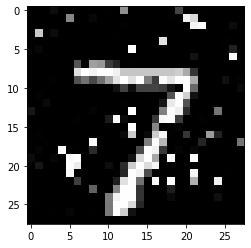

3


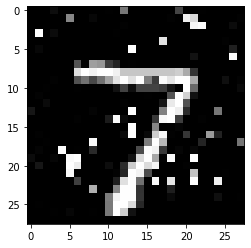

2


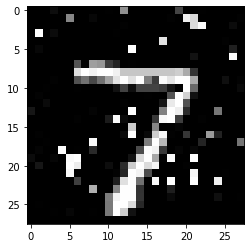

7


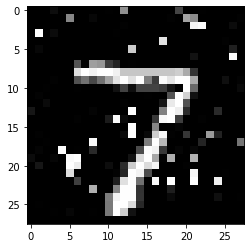

1


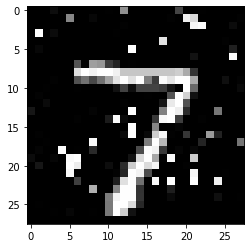

3


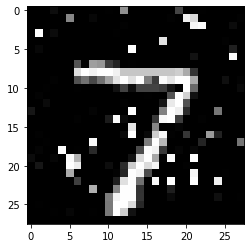

4


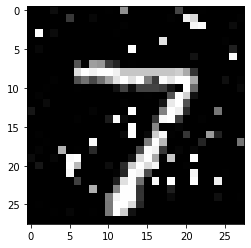

6


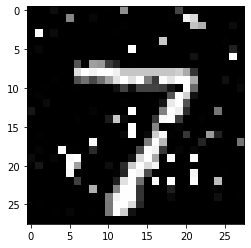

1


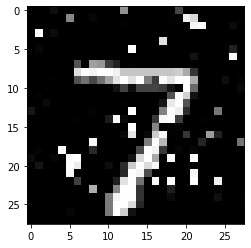

3


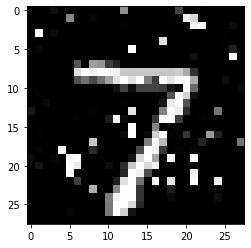

3


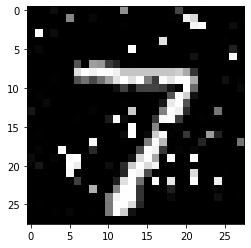

4


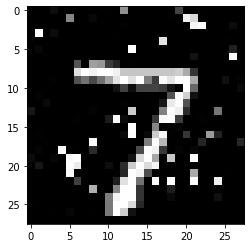

6


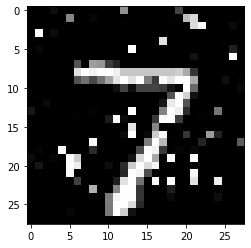

3


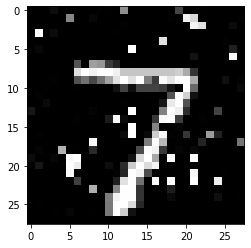

4


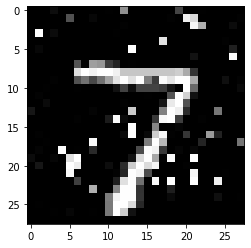

4


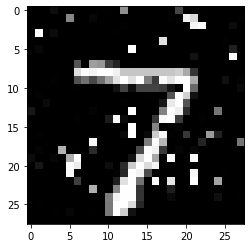

6


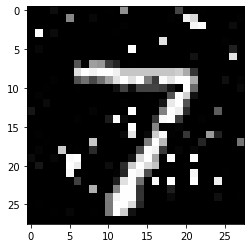

1


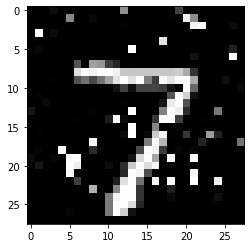

5


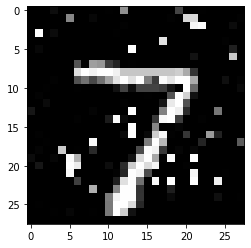

2


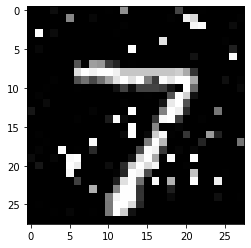

0


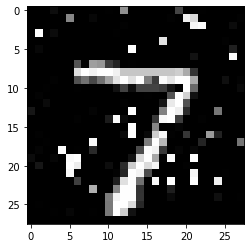

5


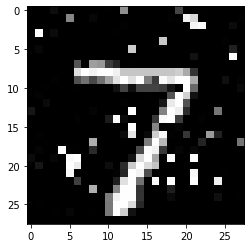

1


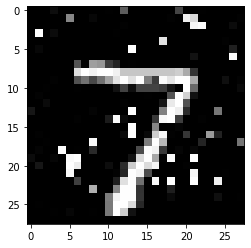

7


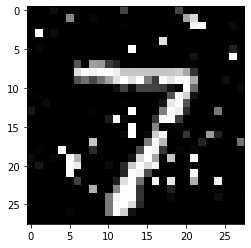

0


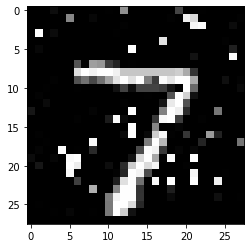

1


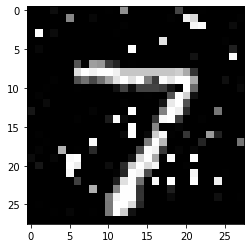

4


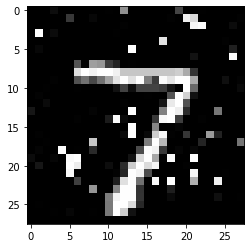

7


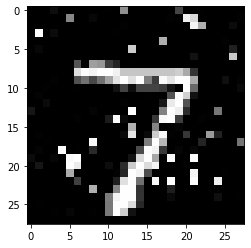

2


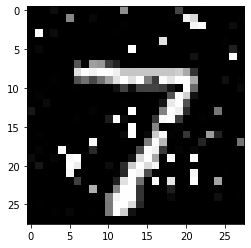

4


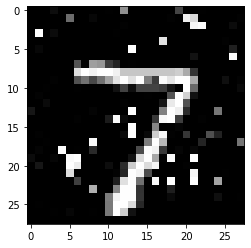

6


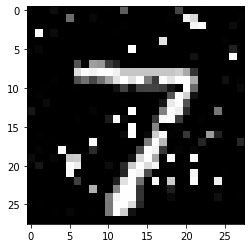

1


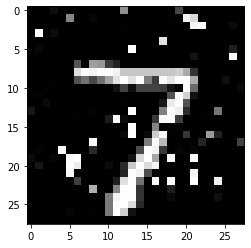

2


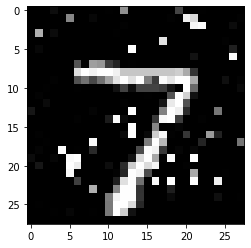

2


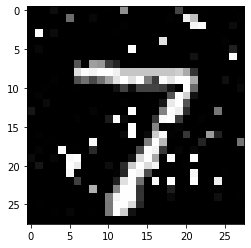

9


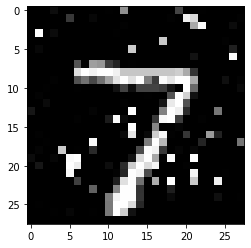

6


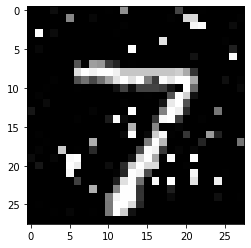

2


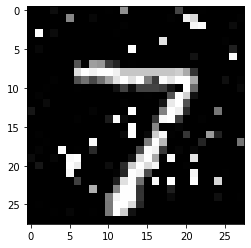

4


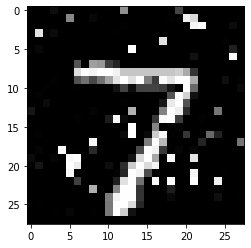

1


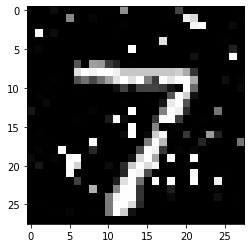

3


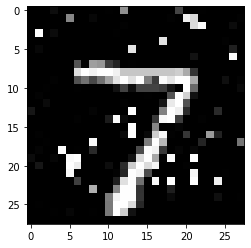

1


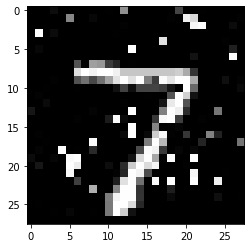

6


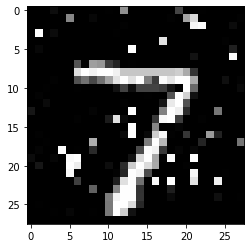

5


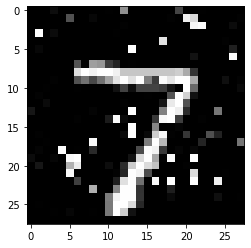

0


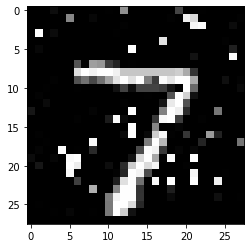

1


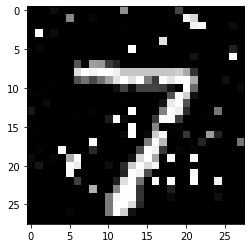

4


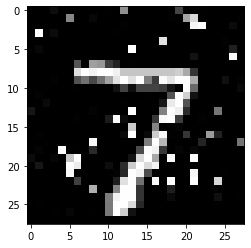

4


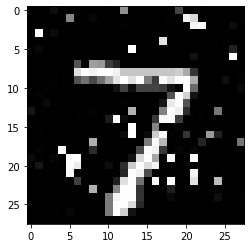

4


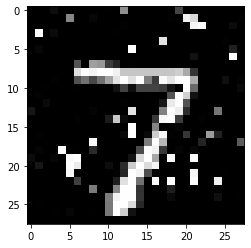

3


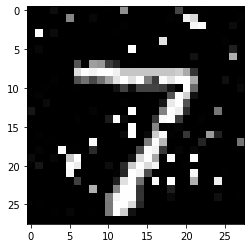

1


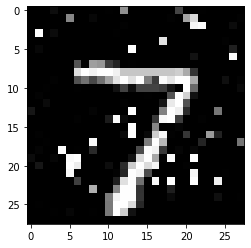

In [10]:
# 种群生成方法1
import copy
x_tmp = copy.deepcopy(x_dif)
x_des = []
for r in range(50):
    count = 0
    for k in range(784):
        if x_dif[k] > 0.3:
            x = random.randint(0,10000)/10000
            if x <= 0.1:
                x_tmp[k] -= random.randint(1,3)/10
                count += 1
    print(count)
    x_des.append(np.array(x_tmp.reshape(1,784)))
    x_re = x_tmp+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_dif)

106


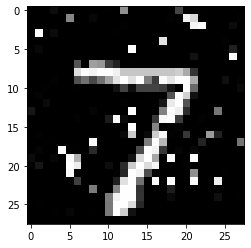

116


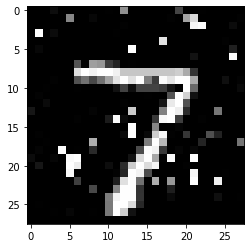

18


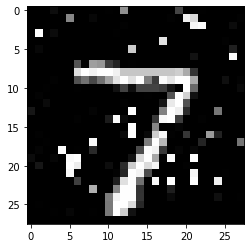

25


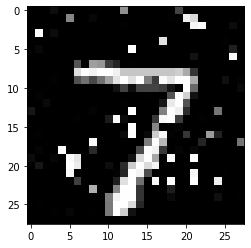

47


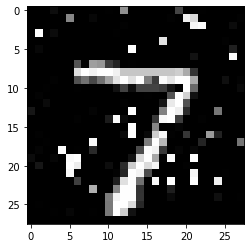

17


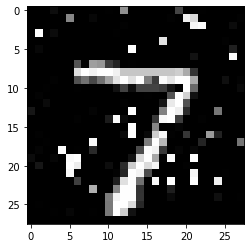

5


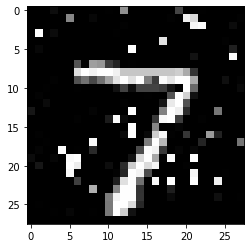

115


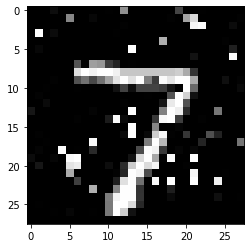

24


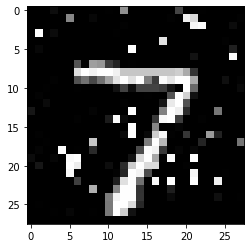

70


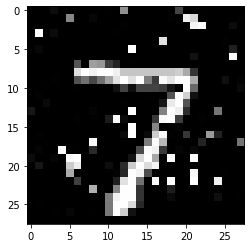

142


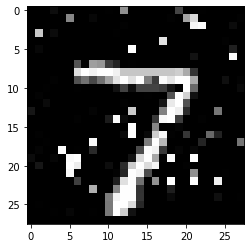

60


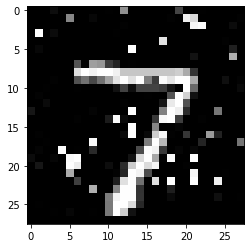

53


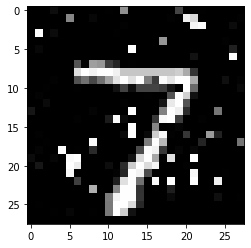

112


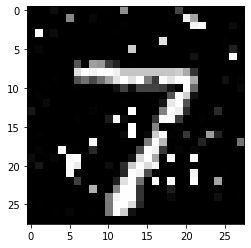

125


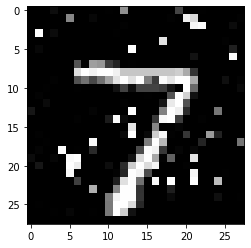

17


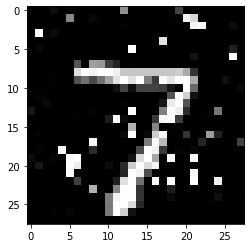

56


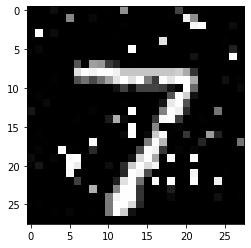

123


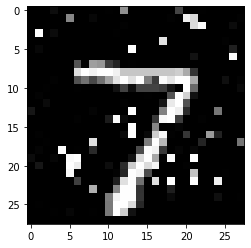

42


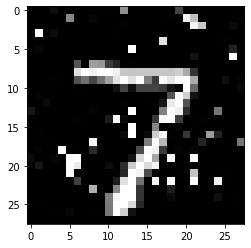

33


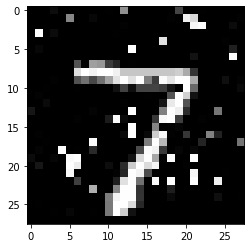

97


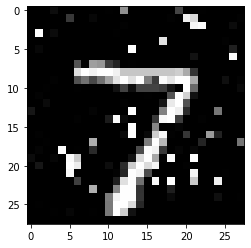

32


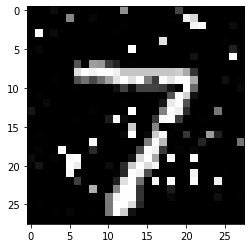

71


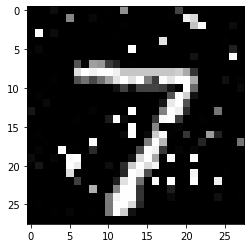

4


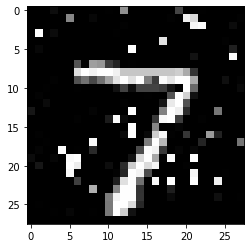

136


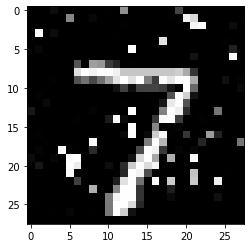

118


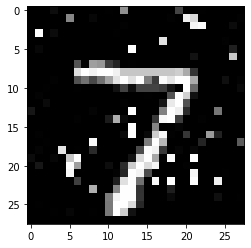

132


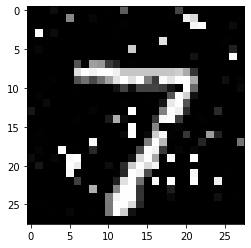

74


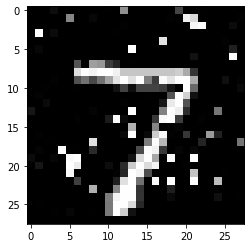

138


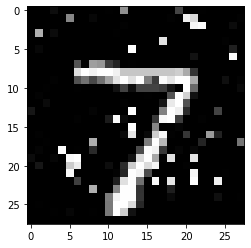

68


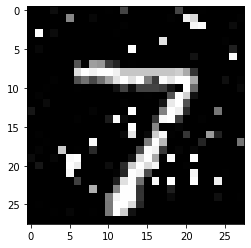

33


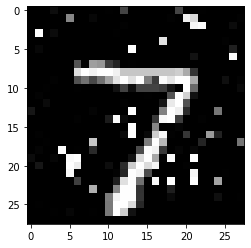

139


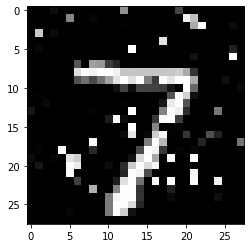

9


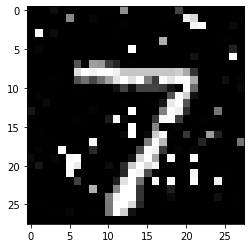

144


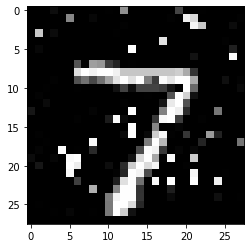

90


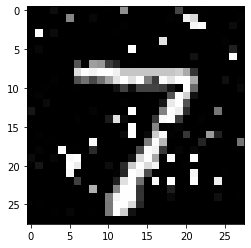

60


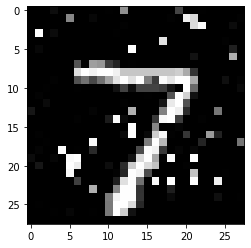

44


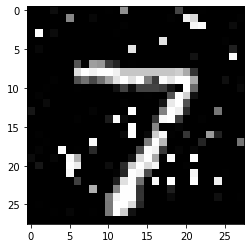

43


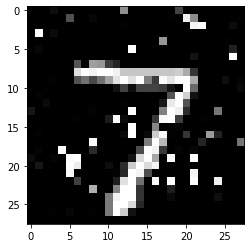

152


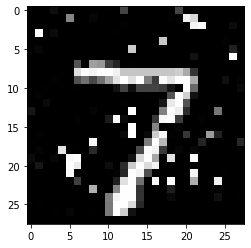

104


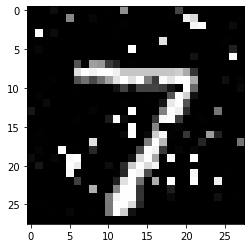

145


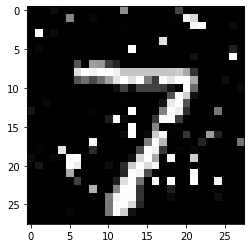

44


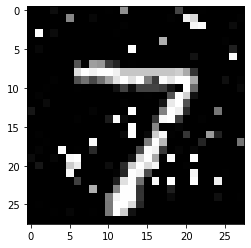

147


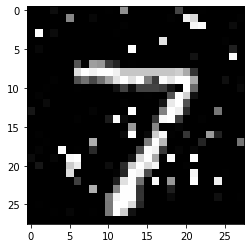

76


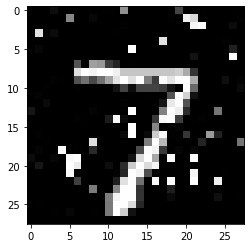

29


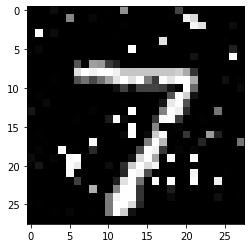

111


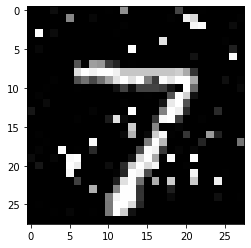

131


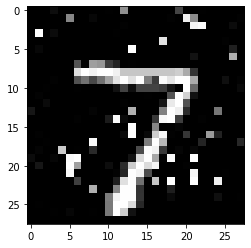

48


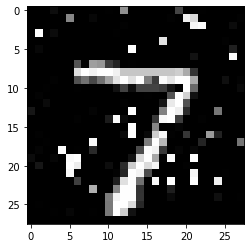

72


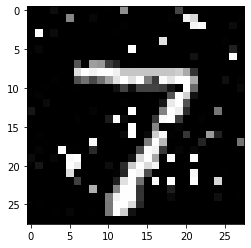

22


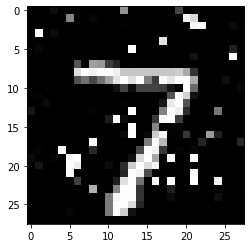

In [8]:
# 种群生成方法2
import copy
x_tmp = copy.deepcopy(x_dif)
x_des1 = []
for r in range(50):
    x = []
    L = random.randint(1,166)
    for i in range(L):
        x.append(random.randint(0,783))
        if x_tmp[x[i]] > 0.3:
            x_tmp[x[i]] -= random.randint(1,3)/10

    x_des1.append(np.array(x_tmp.reshape(1,784)))
    print(L)
    x_re = x_tmp+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_dif)

In [11]:
model = load_model('mnist_model.h5')

In [12]:
def Func(x):     # 将攻击点与原图结合
    d3 = x+x_test[0]/255
    result=model.predict(d3.reshape(1,784))
    return result[0][7]

In [13]:
def Dis(x):   # 扰动值
    res = 0
    for i in range(784):
        l = x[i]
        res += l**2
    return res

最优值： 0.20587754 扰动程度 28.5400146279926
最优值： 0.22822182 扰动程度 27.663418130854804
最优值： 0.23508179 扰动程度 27.1289115187926
最优值： 0.23508179 扰动程度 27.1289115187926
最优值： 0.23759627 扰动程度 27.0107838026302
最优值： 0.27919903 扰动程度 26.764049292873544
最优值： 0.22489269 扰动程度 26.614967337973486
最优值： 0.2297277 扰动程度 26.464389349285423
最优值： 0.23561414 扰动程度 26.313936882233744
最优值： 0.2567356 扰动程度 25.75007098432826
最优值： 0.26800373 扰动程度 25.587468917664328
最优值： 0.2703209 扰动程度 25.441001207602497
最优值： 0.28395134 扰动程度 25.235818323797982
最优值： 0.28226274 扰动程度 25.316453944874166
最优值： 0.3048626 扰动程度 24.812465164756826
最优值： 0.31840655 扰动程度 24.87670400477493
最优值： 0.3414207 扰动程度 24.6325052935352
最优值： 0.33468065 扰动程度 24.19377064051568
最优值： 0.35112622 扰动程度 23.762439203583877
最优值： 0.34919098 扰动程度 23.73459622490146
最优值： 0.35141626 扰动程度 23.05700751728335
最优值： 0.35970974 扰动程度 22.99863994955873
最优值： 0.40975842 扰动程度 22.831984743484327
最优值： 0.3731478 扰动程度 22.700368362579727
最优值： 0.43085414 扰动程度 22.455947287423676
最优值： 0.43730465 扰动程度 2

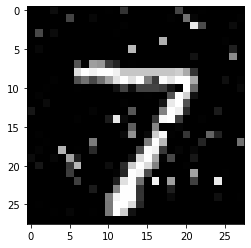

In [16]:
#1
MAX_GENERATION = 100  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.22404997 扰动程度 28.169120159792605
最优值： 0.22649483 扰动程度 27.868901298050403
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.24905427 扰动程度 27.734127986824205
最优值： 0.25748032 扰动程度 27.365575497118744
最优值： 0.28001806 扰动程度 27.170578040361185
最优值： 0.2871664 扰动程度 27.081834170987
最优值： 0.29162744 扰动程度 26.9711854017158
最优值： 0.2531252 扰动程度 26.751101386520567
最优值： 0.29480082 扰动程度 26.223946337451633
最优值： 0.31156906 扰动程度 25.627329928594154
最优值： 0.31149566 扰动程度 25.643158903270862
最优值： 0.31492594 扰动程度 25.47480777394885
最优值： 0.3099724 扰动程度 25.24341427742928
最优值： 0.30826995 扰动程度 24.900869358202883
最优值： 0.30888087 扰动程度 24.92201093913507
最优值： 0.33807003 扰动程度 24.458630696943004
最优值： 0.33639446 扰动程度 24.54209050010277
最优值： 0.33764747 扰动程度 24.080097051698562
最优值： 0.34118104 扰动程度 23.915027337440566
最优值： 0.37426662 扰动程度 23.783477939254198
最优值： 0.3702818 扰动程度 23.363908518082955
最优值： 0.38184118 扰动程度 23.153494085642006
最优值： 0.456127

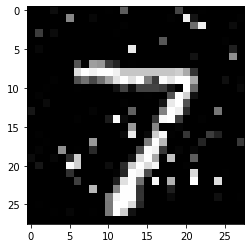

In [12]:
#2
MAX_GENERATION = 50  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X_2 = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des1, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X_2 = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X_2 + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X_2适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X_2 = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X_2),"扰动程度",Dis(BEST_X_2))
        if GENERATION == MAX_GENERATION:
            BEST_2 = BEST_X_2+x_test[0]/255
            print(BEST_X_2)
            plt.imshow(BEST_2.reshape(28,28),cmap='gray')
            plt.show()
            break

In [17]:
BEST_X

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.46579213e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.71096554e-04,  0.00000000e+00,  4.49506713e-03,  0.00000000e+00,
        2.01548045e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.67657184e-01,
        0.00000000e+00,  0.00000000e+00,  4.19932806e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00360227e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.64758943e-01,  0.00000000e+00,  0.00000000e+00,
        2.90019042e-02,  0.00000000e+00,  2.62874018e-04,  0.00000000e+00,
        0.00000000e+00,  6.64067446e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15709263e-02,  0.00000000e+00,
        4.39182424e-01,  2.62604082e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

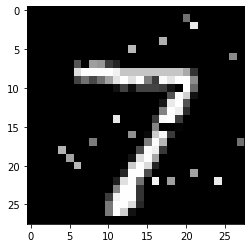

置信度： 0.9576771
[1.0577736e-03 2.6830146e-04 1.6434336e-02 2.0079324e-02 7.6676362e-05
 1.8366114e-03 6.4953570e-06 9.5767713e-01 1.2008507e-03 1.3624809e-03]


In [41]:
#过滤
x_f = copy.deepcopy(BEST_X)
for i in range(784):
    if abs(x_f[i]) < 0.4:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

0.9745988
0.9657782
0.96108824
0.9707454
0.9589536
0.96791863
0.96702975
0.9654601
0.9632307
0.9576771
0.9629611
0.964655
0.966123
0.9575601
迭代: 1
置信度： 0.9575601


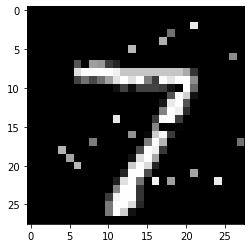

0.9575609
0.97366625
0.9651191
0.96287465
0.95870477
0.96588814
0.96605396
0.9653148
0.9671747
0.96970457
0.95789593
0.9575601
0.9766753
0.9620204
0.9600042
0.9529189
迭代: 2
置信度： 0.9529189


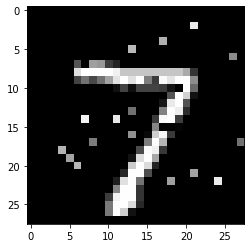

0.97044957
0.9696213
0.9583367
0.94066036
迭代: 3
置信度： 0.94066036


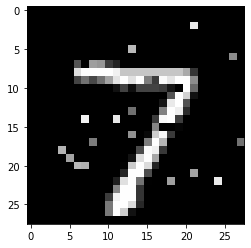

0.93651456
迭代: 4
置信度： 0.93651456


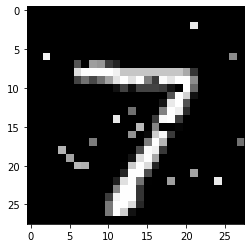

0.9512456
0.95101917
0.94783664
0.95142376
0.94745207
0.94951975
0.9563432
0.9484946
0.9497124
0.9406588
0.93651456
0.9376614
0.9404635
0.93121994
迭代: 5
置信度： 0.93121994


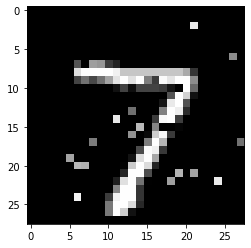

0.93121994
0.94124883
0.9256663
迭代: 6
置信度： 0.9256663


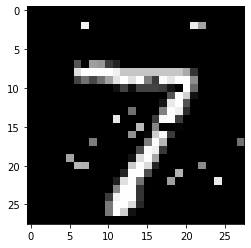

0.9418731
0.9256663
0.9256663
0.93707246
0.9256663
0.96087724
0.9256663
0.907805
迭代: 7
置信度： 0.907805


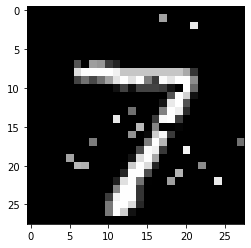

0.914575
0.90526986
迭代: 8
置信度： 0.90526986


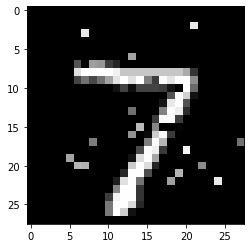

0.88732743
迭代: 9
置信度： 0.88732743


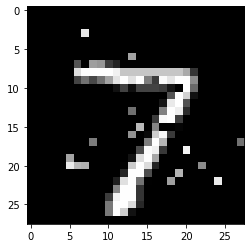

0.8846316
迭代: 10
置信度： 0.8846316


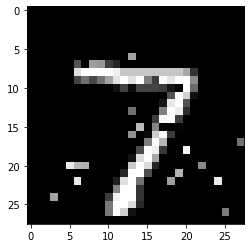

0.91560155
0.8846316
0.88836956
0.9424141
0.9514203
0.8719808
迭代: 11
置信度： 0.8719808


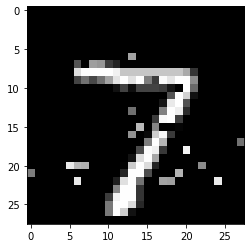

0.8965996
0.8728137
0.8719808
0.9323117
0.90339684
0.8906948
0.91646653
0.88594526
0.89926094
0.9352053
0.8699815
迭代: 12
置信度： 0.8699815


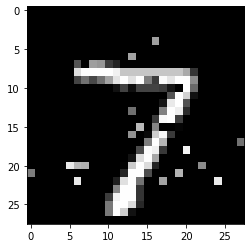

0.8996182
0.8700625
0.9167652
0.8699815
0.9072454
0.8996232
0.9030285
0.91905075
0.8619263
迭代: 13
置信度： 0.8619263


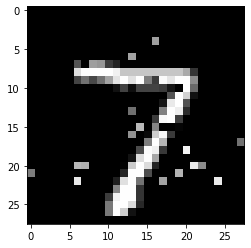

0.92438245
0.9062491
0.8706801
0.876984
0.87959814
0.8766841
0.89957696
0.9002119
0.91192377
0.9116014
0.8619263
0.92559874
0.8656735
0.91502035
0.8598409
迭代: 14
置信度： 0.8598409


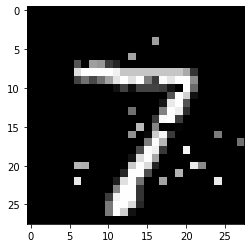

0.9378578
0.92489487
0.8925618
0.88138276
0.8598409
0.8536288
迭代: 15
置信度： 0.8536288


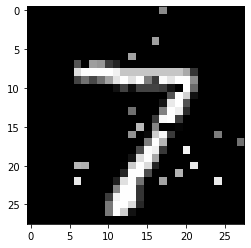

0.8536288
0.9193565
0.9007228
0.891804
0.8536288
0.85446966
0.8547172
0.8981908
0.903816
0.94327766
0.8731172
0.86474025
0.8817007
0.8536288
0.9075627
0.8536288
0.90544057
0.8536288
0.9334259
0.8536288
0.8536288
0.87807375
0.88249147
0.8520115
迭代: 16
置信度： 0.8520115


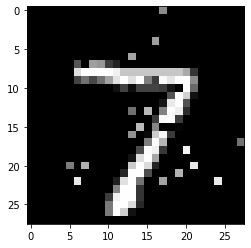

0.8900415
0.86573327
0.8520115
0.8864089
0.90810245
0.8520115
0.8520115
0.8724259
0.9163071
0.95005304
0.9551483
0.8834293
0.8241104
迭代: 17
置信度： 0.8241104


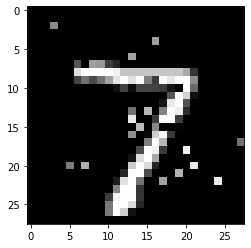

0.90515184
0.9045701
0.92103744
0.88160026
0.8499961
0.8241104
0.8471798
0.879255
0.8489347
0.8911379
0.8241104
0.8831697
0.8960489
0.8829772
0.8241104
0.9169509
0.8779675
0.8241104
0.88416946
0.8241104
0.825939
0.8588137
0.8537385
0.84143096
0.8492011
0.90053
0.88241094
0.84909534
0.85734034
0.85705566
0.8520335
0.88614684
0.8241104
0.8573152
0.91055113
0.81049687
迭代: 18
置信度： 0.81049687


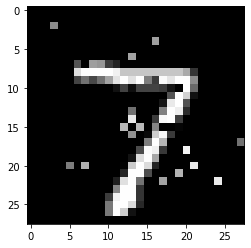

0.85509783
0.81049687
0.8913406
0.8910096
0.8356671
0.8892291
0.8064666
迭代: 19
置信度： 0.8064666


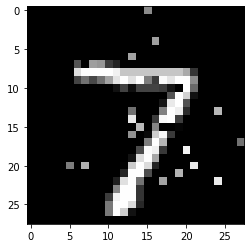

0.8140619
0.81994635
0.8805014
0.85658926
0.8434684
0.829297
0.8497102
0.8354382
0.89192
0.8747922
0.88005626
0.8064666
0.8911249
0.8329912
0.8412203
0.8975577
0.85321385
0.84212595
0.8274605
0.79559165
迭代: 20
置信度： 0.79559165


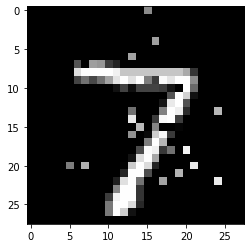

0.8113131
0.83391035
0.79559165
0.8093712
0.79559165
0.8910231
0.79559165
0.79559165
0.84134436
0.8060009
0.79559165
0.79559165
0.8791833
0.79559165
0.8551712
0.8279855
0.92313284
0.79559165
0.82861334
0.8810616
0.8294955
0.84496593
0.78458565
迭代: 21
置信度： 0.78458565


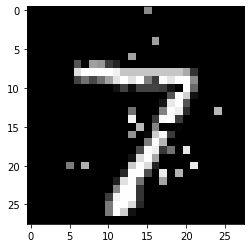

0.847428
0.87790334
0.86571634
0.8139895
0.8322802
0.7995511
0.8714747
0.8786821
0.78458565
0.92650205
0.83239895
0.79327977
0.8679763
0.8579465
0.867034
0.87261033
0.78458565
0.77971005
迭代: 22
置信度： 0.77971005


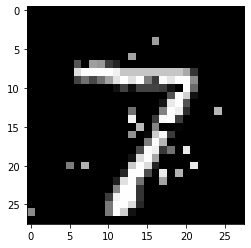

0.8517014
0.83396095
0.8483956
0.8628865
0.89365673
0.80196136
0.8916191
0.85303646
0.89719653
0.77971005
0.84939975
0.77971005
0.8340864
0.8221273
0.85594636
0.82193327
0.7952371
0.8192116
0.77971005
0.77971005
0.81761706
0.8924429
0.8964648
0.9026328
0.87525916
0.8152323
0.87237966
0.77971005
0.77971005
0.8142667
0.77971005
0.8171183
0.77971005
0.83614177
0.8334406
0.88612837
0.77971005
0.900146
0.9308754
0.8285368
0.77971005
0.9013591
0.8122
0.8017352
0.9218546
0.88252395
0.8390626
0.8916036
0.77971005
0.8248018
0.9024909
0.8332709
0.84018856
0.91134566
0.9006355
0.86307895
0.8506992
0.82886446
0.8551878
0.8255146
0.8652328
0.91310483
0.8863783
0.85528773
0.849939
0.77971005
0.83999807
0.7995025
0.86944246
0.9023419
0.86912704
0.77971005
0.88992685
0.7828566
0.84208745
0.894772
0.80841094
0.89435935
0.8311684
0.90539366
0.8300489
0.8578318
0.77971005
0.8122738
0.8805217
0.90114206
0.8273278
0.84951115
0.84863627
0.77971005
0.81619084
0.92260784
0.8824454
0.7830083
0.82329774
0.89351

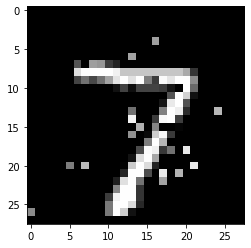

0.7796857
0.8553548
0.7796857
0.7906617
0.7796857
0.8015549
0.86959136
0.82782173
0.8541126
0.8598338
0.79970616
0.8834101
0.8300099
0.85397625
0.92060745
0.84497744
0.8055265
0.8360943
0.8290985
0.8455271
0.7796857
0.83388114
0.8134446
0.8188062
0.85319054
0.8748556
0.81674373
0.8751962
0.9252507
0.7796857
0.8789007
0.77470076
迭代: 24
置信度： 0.77470076


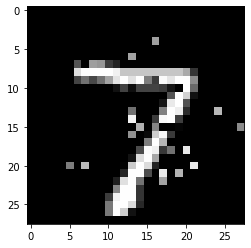

0.8608589
0.8525923
0.87568015
0.8750466
0.843184
0.77470076
0.8517472
0.9108876
0.894102
0.8355719
0.7862163
0.8977881
0.8388579
0.8474843
0.8402194
0.8295341
0.8730695
0.77470076
0.84108114
0.77470076
0.88134897
0.8507298
0.77470076
0.8103085
0.85711014
0.91079926
0.84984624
0.8944127
0.77470076
0.8262137
0.8584279
0.8498826
0.8699668
0.77470076
0.92912656
0.77470076
0.8806389
0.8591656
0.85213536
0.8299496
0.8672208
0.83711493
0.83024323
0.85857916
0.87126523
0.83002156
0.89079463
0.8567466
0.77470076
0.8246731
0.77470076
0.8904989
0.84051883
0.8527793
0.8568971
0.77470076
0.7996018
0.77470076
0.77470076
0.8193759
0.8372477
0.8244558
0.8335351
0.77470076
0.877503
0.78953314
0.80855435
0.8494305
0.87836456
0.85723513
0.84760016
0.8376521
0.8636001
0.8649444
0.77470076
0.77340144
迭代: 25
置信度： 0.77340144


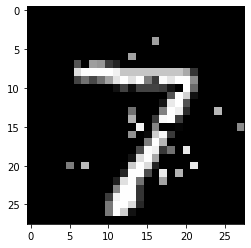

0.8134311
0.7979285
0.8012407
0.83955544
0.80064
0.8154818
0.8239594
0.9079036
0.77340144
0.8358442
0.8554363
0.86292064
0.90448594
0.8561786
0.8438245
0.867977
0.77340144
0.77340204
0.75847197
迭代: 26
置信度： 0.75847197


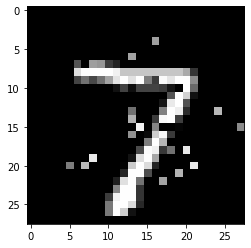

0.8731139
0.75847197
0.75847197
0.7897232
0.7345262
迭代: 27
置信度： 0.7345262


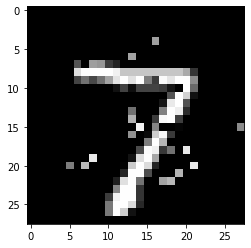

0.77596
0.8194737
0.7345262
0.79452926
0.7345262
0.8432745
0.8633331
0.77323765
0.77890474
0.886947
0.90635616
0.7345262
0.8358681
0.78139186
0.77867556
0.85083675
0.8244262
0.77451915
0.82930905
0.89294493
0.8292699
0.837904
0.83959794
0.8089217
0.7563016
0.84702545
0.86876416
0.8680862
0.79785526
0.7961807
0.8649002
0.78814256
0.80431616
0.7345262
0.8249613
0.89712006
0.86639035
0.7852463
0.7345262
0.8227129
0.8479847
0.83945864
0.75013816
0.82358366
0.7303706
迭代: 28
置信度： 0.7303706


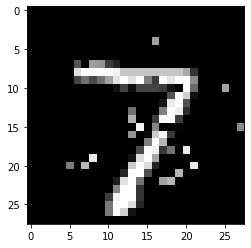

0.83378994
0.7474069
0.82486296
0.82387847
0.84882206
0.804128
0.7930261
0.8295318
0.8093086
0.76713806
0.7971039
0.7487343
0.82597166
0.7303706
0.84324324
0.82226366
0.7556728
0.7825116
0.83269083
0.78545827
0.7906423
0.7303706
0.7303706
0.86440474
0.7415782
0.9440707
0.77538157
0.7303706
0.7303706
0.74929464
0.8893844
0.74562985
0.8882939
0.84821236
0.8426447
0.80223495
0.7745375
0.8593393
0.7303706
0.8542322
0.8575771
0.7303706
0.7303706
0.797975
0.8205795
0.7303706
0.8847232
0.7303706
0.78262
0.776098
0.8458853
0.7303706
0.81932044
0.83786154
0.7303706
0.7512534
0.7303706
0.83812654
0.77411246
0.7303706
0.8620659
0.78082716
0.8817999
0.79567224
0.8215093
0.8344978
0.7731739
0.84076566
0.75969166
0.92412937
0.8574569
0.81885624
0.8130011
0.80823123
0.74669707
0.7637323
0.7303706
0.81254005
0.8080451
0.80364275
0.7303706
0.8966644
0.8693666
0.883769
0.75511867
0.75971806
0.85468155
0.85184723
0.7527162
0.7303706
0.77117455
0.8011811
0.88048935
0.7303706
0.7303706
0.80371106
0.8599404

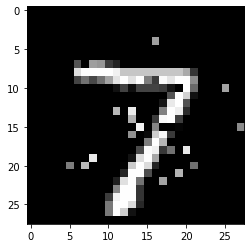

0.71763337
0.80255055
0.8159565
0.84234846
0.7537607
0.9146437
0.8115185
0.8363801
0.7842408
0.7665022
0.7687
0.76832426
0.71763337
0.74966687
0.84593356
0.8135539
0.75344175
0.8893414
0.8604512
0.76926064
0.7881322
0.8476698
0.79302925
0.74032134
0.71763337
0.76699495
0.8916766
0.7587374
0.71763337
0.7716364
0.75107014
0.71763337
0.71763337
0.7219278
0.88352835
0.73360044
0.79650086
0.73449075
0.8809931
0.85067344
0.9380267
0.80230135
0.7823681
0.84400153
0.8751295
0.9480604
0.868164
0.86063206
0.7799145
0.8427154
0.7640566
0.82714236
0.8024654
0.76127326
0.7541572
0.7462673
0.75834405
0.7716719
0.8323371
0.84179515
0.8899425
0.8443839
0.75027657
0.77718174
0.7743985
0.75329983
0.74189734
0.8862843
0.7590892
0.8378434
0.88420963
0.79357016
0.7820231
0.71763337
0.9144357
0.84465766
0.78718275
0.794387
0.8184049
0.71763337
0.71763337
0.7754992
0.87664276
0.71763337
0.75992143
0.70622176
迭代: 30
置信度： 0.70622176


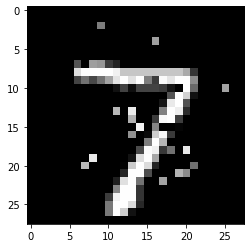

0.70622176
0.7617154
0.81267536
0.7478628
0.7476852
0.83397573
0.75968
0.7539562
0.8451997
0.70622176
0.84525406
0.75457597
0.7495554
0.74008846
0.8450349
0.7504247
0.8206386
0.7781322
0.7543806
0.75260335
0.7208051
0.76378053
0.70622176
0.8443778
0.70551926
迭代: 31
置信度： 0.70551926


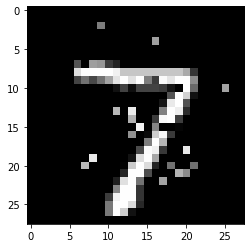

0.88283944
0.8896637
0.74324054
0.74654126
0.7587075
0.7991585
0.77834415
0.783352
0.70551926
0.70551926
0.70551926
0.78880584
0.80562955
0.8426912
0.8109124
0.81172013
0.7922984
0.914036
0.7395734
0.70551926
0.73200554
0.9096512
0.82991236
0.75655013
0.70551926
0.77794427
0.70551926
0.70551926
0.83596295
0.7548373
0.79039156
0.70551926
0.8832479
0.7009674
迭代: 32
置信度： 0.7009674


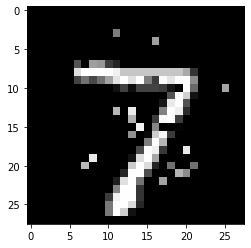

0.7509157
0.7009674
0.75360703
0.8826125
0.7009674
0.7009674
0.80250585
0.81989205
0.7219143
0.7927805
0.8237035
0.80729824
0.79747117
0.7184614
0.71983534
0.8295827
0.8474247
0.7411814
0.7981822
0.75990415
0.7490576
0.794963
0.7406642
0.7009674
0.85362
0.73170674
0.7009674
0.85373473
0.81242174
0.8257443
0.73241264
0.7111185
0.767127
0.80298644
0.7576521
0.71611524
0.74484956
0.7009674
0.7870328
0.796349
0.7163685
0.79938775
0.7368278
0.7683736
0.7316793
0.74080807
0.7009674
0.8935139
0.74589616
0.8633351
0.7682376
0.7009674
0.77843726
0.9026495
0.7221418
0.87120706
0.81097496
0.7691731
0.7009674
0.84923816
0.7769134
0.6920867
迭代: 33
置信度： 0.6920867


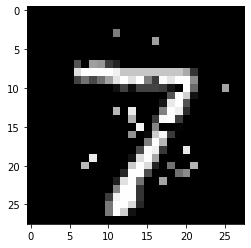

0.837088
0.82191145
0.7793115
0.6920867
0.6920867
0.80061
0.700061
0.88675636
0.7639525
0.8289748
0.6920867
0.7597095
0.8890739
0.76670665
0.88174057
0.75499505
0.73906237
0.88004756
0.6920867
0.6920867
0.7001488
0.73082757
0.71064377
0.6920867
0.8611094
0.82720155
0.8032807
0.8632519
0.6920867
0.8543054
0.77128583
0.8378476
0.77428573
0.8650407
0.7092306
0.7262814
0.7689533
0.7718933
0.74478894
0.69441986
0.6920867
0.7818066
0.7713504
0.6920867
0.7131257
0.6878155
迭代: 34
置信度： 0.6878155


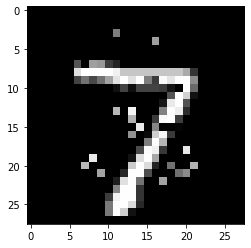

0.6878155
0.7746908
0.6878155
0.8311092
0.79317397
0.7403491
0.84234446
0.6878155
0.68622005
迭代: 35
置信度： 0.68622005


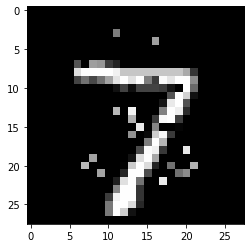

0.8923759
0.71145535
0.68622005
0.74596417
0.72012573
0.6996135
0.66348743
迭代: 36
置信度： 0.66348743


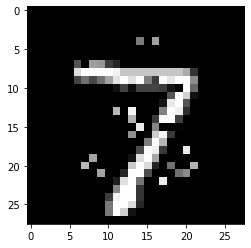

0.7247498
0.8000773
0.66348743
0.849253
0.7608115
0.7079962
0.66348743
0.66348743
0.83585334
0.69907534
0.71012956
0.75817496
0.6876985
0.735493
0.80235255
0.76317424
0.82395583
0.81313926
0.66348743
0.7681998
0.83030164
0.7528453
0.8804972
0.8151365
0.66348743
0.66348743
0.6904421
0.77158374
0.6712668
0.66348743
0.8929942
0.6852782
0.7355768
0.66348743
0.66348743
0.78240496
0.8395957
0.70398
0.73257977
0.7906406
0.66348743
0.72214955
0.7051502
0.6757782
0.81370527
0.8326884
0.77544385
0.78245115
0.81739676
0.7069373
0.8093228
0.83898824
0.66348743
0.838945
0.66348743
0.8808681
0.7140582
0.69017947
0.7186155
0.7288664
0.7983585
0.805758
0.760863
0.75211036
0.66348743
0.7708747
0.8294761
0.6965541
0.7669236
0.7091422
0.71907824
0.8308435
0.8342002
0.72154605
0.6627207
迭代: 37
置信度： 0.6627207


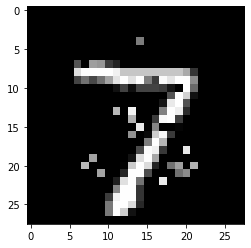

0.6627207
0.8709872
0.77685726
0.80819243
0.7782407
0.8817792
0.7602236
0.697395
0.6627207
0.6627207
0.7684606
0.7055667
0.91440773
0.70834106
0.7169977
0.6627207
0.84306633
0.6860671
0.75058216
0.6637839
0.6932141
0.7530197
0.7651559
0.73630565
0.7146815
0.6627207
0.6627207
0.67672926
0.6627207
0.8428408
0.6627207
0.81029046
0.76384735
0.6627207
0.8358174
0.82246304
0.89635223
0.6627207
0.80624634
0.7918098
0.71895915
0.69553876
0.695527
0.74708474
0.82633686
0.7653788
0.6627207
0.7457673
0.7708923
0.8510717
0.82779384
0.72507817
0.6757923
0.76398116
0.8057642
0.73206764
0.7337384
0.81045336
0.8387001
0.8154752
0.80623204
0.6627207
0.6627207
0.76317906
0.8320176
0.82380235
0.7107168
0.67921644
0.7254055
0.6627207
0.9019926
0.76326853
0.6627207
0.7903623
0.79744166
0.6627207
0.70092195
0.7362922
0.8267548
0.682462
0.87748975
0.716827
0.78994906
0.76714295
0.7415877
0.6627207
0.73491216
0.85491675
0.7317985
0.8638957
0.70048493
0.69923043
0.82144874
0.7746985
0.6627207
0.7145334
0.80056

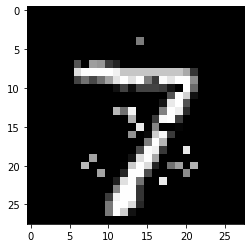

0.6843378
0.6252359
迭代: 39
置信度： 0.6252359


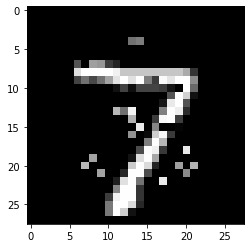

0.67275363
0.8024749
0.6252359
0.6252359
0.81532514
0.7280403
0.6995066
0.6252359
0.743007
0.6914598
0.74775827
0.6412932
0.6252359
0.77033836
0.8135253
0.6252359
0.65462846
0.79701406
0.8260591
0.84025127
0.80223364
0.6252359
0.70899045
0.7594801
0.72816014
0.7824658
0.6252359
0.7309865
0.8059642
0.8293762
0.81846523
0.8404454
0.65597856
0.72386605
0.6252359
0.6252359
0.734704
0.76249385
0.6252359
0.6252359
0.8193053
0.7514789
0.7247715
0.76794213
0.74446243
0.69945407
0.673969
0.72436774
0.6938301
0.6252359
0.77728224
0.7720089
0.6252359
0.7727012
0.6764248
0.79855204
0.6252359
0.6651991
0.6252359
0.68124247
0.6252359
0.84550273
0.6252359
0.6621407
0.7138604
0.69511646
0.6465132
0.6252359
0.81968766
0.7947081
0.64642525
0.8447622
0.6252359
0.6879437
0.6642394
0.71642315
0.6252359
0.7941453
0.6252359
0.76829344
0.8923224
0.6707781
0.67640144
0.79851186
0.6285388
0.70661545
0.72678834
0.7330335
0.85160834
0.87309647
0.6252359
0.6987086
0.78541553
0.748749
0.6824375
0.8405426
0.68126166

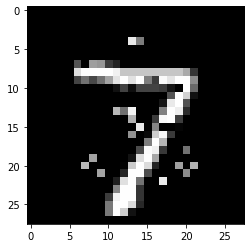

0.76342326
0.7027817
0.73957235
0.71457136
0.620136
0.67201
0.7627551
0.68184555
0.8140962
0.72278935
0.8046489
0.7101121
0.6597653
0.620136
0.620136
0.620136
0.72065353
0.72981936
0.620136
0.59653825
迭代: 41
置信度： 0.59653825


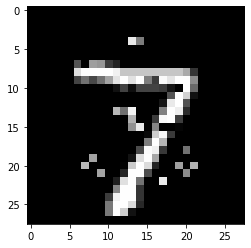

0.59653825
0.7754337
0.7864571
0.661121
0.73316354
0.65477645
0.7334355
0.6322051
0.6193432
0.74907434
0.74227923
0.72964805
0.7071338
0.7784893
0.73549014
0.647677
0.6918309
0.60742
0.7229979
0.6762672
0.6422367
0.6700145
0.83921266
0.61656135
0.59653825
0.7746417
0.59653825
0.65754694
0.7207059
0.780807
0.6750728
0.82081604
0.6636498
0.68920964
0.75202984
0.59653825
0.7383178
0.774295
0.6949209
0.70019203
0.7042206
0.67389715
0.671934
0.8375227
0.8214306
0.59653825
0.73276836
0.6360544
0.8459434
0.59653825
0.87007195
0.6198133
0.7362592
0.6685242
0.7602579
0.63506025
0.74754405
0.8297836
0.59653825
0.79914016
0.6565783
0.64891535
0.59653825
0.7974859
0.59379345
迭代: 42
置信度： 0.59379345


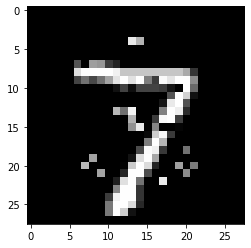

0.6868699
0.59379345
0.7305264
0.62109154
0.64763236
0.7603926
0.75438285
0.76062244
0.59379345
0.59379345
0.68817025
0.8642351
0.86792195
0.59379345
0.79036385
0.6992833
0.6425021
0.60625094
0.6591084
0.6497141
0.59179753
迭代: 43
置信度： 0.59179753


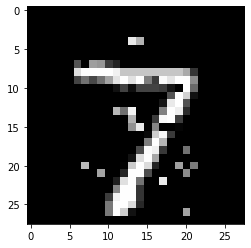

0.70196736
0.6671482
0.6675384
0.7482983
0.6499323
0.81463945
0.89185
0.796187
0.79368556
0.8004025
0.70433116
0.59179753
0.68693125
0.63663805
0.59179753
0.779964
0.7613824
0.74107975
0.76984286
0.6960457
0.7630399
0.71887153
0.7139148
0.7194219
0.787125
0.7053245
0.6025597
0.59179753
0.781598
0.84010977
0.63619596
0.59179753
0.59179753
0.59179753
0.6842495
0.6797026
0.6530034
0.59179753
0.7133155
0.7126223
0.71316993
0.63682175
0.85274684
0.7573309
0.59179753
0.7019135
0.59179753
0.59179753
0.71955144
0.75192326
0.73503375
0.7143222
0.63424736
0.6528407
0.59179753
0.7276626
0.72655094
0.59179753
0.6685876
0.69720864
0.8294587
0.6780456
0.71786743
0.62980145
0.7818543
0.7855391
0.676173
0.7209461
0.68693125
0.65426177
0.8012378
0.79539686
0.59179753
0.6814957
0.683375
0.59179753
0.69176376
0.65316695
0.65748143
0.59179753
0.88400036
0.59179753
0.59179753
0.8915801
0.8510838
0.72965205
0.638191
0.7541714
0.651005
0.6385643
0.81055945
0.59179753
0.7768027
0.74033266
0.6800664
0.74969435

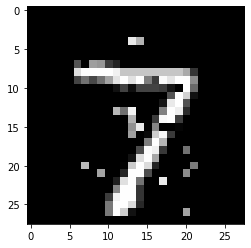

0.71346056
0.68982315
0.687207
0.7613249
0.6601229
0.70616096
0.758514
0.58907723
0.6630084
0.7847338
0.7262026
0.65192854
0.8180399
0.75921935
0.85335046
0.75153464
0.6147463
0.73713595
0.61888385
0.6915626
0.6870199
0.71005476
0.6319003
0.58907723
0.7007689
0.58907723
0.71062
0.69709724
0.66772205
0.64815736
0.58907723
0.6448729
0.7891772
0.58907723
0.85732675
0.753003
0.77925396
0.58907723
0.7190189
0.6243119
0.79993963
0.64787334
0.77068955
0.70288193
0.69858
0.58907723
0.58907723
0.8127851
0.58907723
0.61980766
0.6570238
0.630041
0.8546083
0.7190836
0.58907723
0.62895095
0.789002
0.78616345
0.7157989
0.7548737
0.73393
0.58907723
0.7393162
0.6950485
0.7396039
0.73926896
0.7813534
0.71294206
0.64533937
0.79681844
0.80753195
0.67714846
0.7686238
0.6451826
0.72568834
0.7651038
0.6677567
0.6698978
0.657259
0.58907723
0.75836915
0.7278072
0.6130445
0.7830234
0.7146814
0.58907723
0.7489624
0.64890504
0.72845423
0.73229253
0.8502118
0.5986636
0.58907723
0.58907723
0.80670756
0.74690664
0.

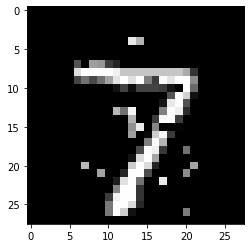

0.73832434
0.6322518
0.7241831
0.68033034
0.58662313
0.7691185
0.68430966
0.6744425
0.77097356
0.7971481
0.76366544
0.66088134
0.58662313
0.68218005
0.69848144
0.7470933
0.58662313
0.7321026
0.71240884
0.58662313
0.78462785
0.664025
0.58662313
0.65287185
0.58662313
0.6810178
0.6449529
0.73655415
0.79935515
0.6748472
0.58662313
0.58662313
0.58662313
0.75407624
0.7733104
0.80554837
0.8000681
0.71941334
0.76489264
0.6475914
0.7964135
0.77644616
0.77385086
0.63623554
0.6353335
0.8088442
0.8183747
0.6613291
0.70912266
0.61971414
0.70554894
0.58662313
0.6785965
0.58662313
0.651015
0.6460487
0.8291128
0.62737346
0.7074374
0.705419
0.58662313
0.75944805
0.58662313
0.73389065
0.6416618
0.7406167
0.85193294
0.78881675
0.65581435
0.6486354
0.58662313
0.6876831
0.7788286
0.68500745
0.58662313
0.785017
0.6973027
0.68363166
0.59990305
0.61306566
0.58662313
0.7008813
0.58662313
0.82201195
0.6255725
0.7497987
0.76298916
0.7925149
0.81377244
0.58662313
0.58662313
0.76779115
0.7466911
0.6479476
0.586623

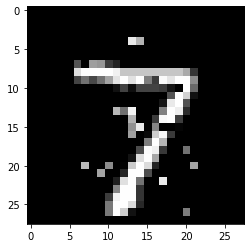

0.6727981
0.6921578
0.67501426
0.7200962
0.8496326
0.6315458
0.72765374
0.647903
0.7371955
0.75209373
0.5913779
0.64168394
0.5787076
0.65664274
0.8000052
0.7796716
0.80591005
0.5787076
0.5787076
0.6818868
0.70931107
0.6443786
0.8248314
0.6848476
0.6536505
0.60749674
0.8097434
0.6760816
0.8133425
0.7251091
0.62403834
0.6957118
0.66317993
0.70057976
0.74286044
0.67439574
0.6717897
0.78654426
0.71050745
0.6327295
0.72195846
0.7352236
0.8272728
0.7416213
0.6442315
0.733309
0.8283579
0.7300834
0.64628714
0.5787076
0.6728684
0.68689436
0.663634
0.64472777
0.5787076
0.5787076
0.5787076
0.6307429
0.70383024
0.7175486
0.7386553
0.63553727
0.7694083
0.71535355
0.6387161
0.8144159
0.6473281
0.7026924
0.7078165
0.7229804
0.5787076
0.751982
0.6189989
0.5787076
0.5864049
0.77576107
0.7358514
0.86646694
0.6391227
0.6781672
0.63459045
0.70578134
0.6580419
0.64041215
0.6399005
0.8056324
0.6342847
0.71729225
0.5787076
0.6530462
0.7651338
0.8620209
0.8599315
0.7812371
0.77318436
0.74676335
0.7938037
0.62

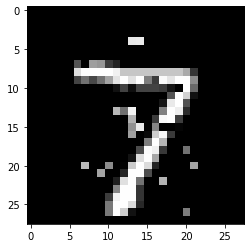

0.7353589
0.5708551
0.64572483
0.65923053
0.6749173
0.8076709
0.8082293
0.8195186
0.7496059
0.7044997
0.76339346
0.6476052
0.65884
0.66168755
0.5708551
0.82606995
0.84943205
0.7116126
0.5708551
0.6933294
0.7645055
0.6286024
0.5708551
0.6496633
0.65429133
0.7383898
0.5708551
0.8537951
0.68690735
0.6821032
0.64352703
0.5708551
0.73727864
0.6310715
0.69272786
0.7753129
0.79633427
0.7359091
0.5708551
0.5708551
0.7836956
0.835029
0.5708551
0.68157274
0.6640912
0.7008743
0.5708551
0.66119236
0.70580703
0.7784646
0.61052126
0.611063
0.5767905
0.77932155
0.75298065
0.688879
0.5862619
0.69616634
0.8364936
0.6516823
0.7064887
0.7479071
0.5708551
0.6433818
0.8375422
0.79493827
0.6431585
0.74904776
0.7373771
0.5708551
0.80913925
0.75826985
0.7906891
0.64968646
0.5708551
0.62072515
0.6711693
0.792688
0.74221486
0.7847685
0.5708551
0.7681486
0.84181076
0.5708551
0.5708551
0.6563119
0.8110431
0.58414066
0.7889295
0.80783856
0.69100356
0.6127463
0.73255056
0.7210312
0.6828493
0.76682496
0.768619
0.617

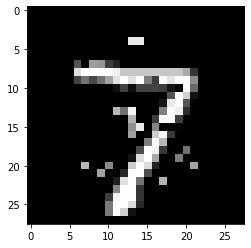

0.6430968
0.5587745
0.71549344
0.61613256
0.65530914
0.6245006
0.72796905
0.6004546
0.5839626
0.7595687
0.61176217
0.5587745
0.6492226
0.6659134
0.7911047
0.5587745
0.74385256
0.5854688
0.5587745
0.832201
0.6567231
0.5853192
0.7114153
0.5587745
0.68343985
0.6627801
0.67257154
0.6217702
0.6092169
0.81396264
0.80563015
0.61842567
0.7054833
0.62819785
0.55008435
迭代: 49
置信度： 0.55008435


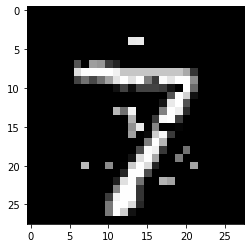

0.683032
0.7020568
0.55008435
0.55008435
0.6449354
0.64311075
0.6008556
0.8189963
0.5797472
0.5523881
0.5922008
0.55008435
0.61785305
0.80572253
0.6398114
0.7849231
0.5742146
0.877183
0.55008435
0.85537875
0.65010846
0.55008435
0.6481629
0.55008435
0.58761615
0.70378643
0.7486265
0.58806866
0.59594476
0.6750095
0.64008075
0.6427165
0.55008435
0.7139125
0.7896678
0.6194238
0.82460123
0.6416995
0.59382737
0.6391727
0.55008435
0.55008435
0.6301492
0.66948634
0.55008435
0.7545124
0.7298943
0.61679655
0.79517573
0.77526253
0.55008435
0.81210744
0.55008435
0.5946369
0.815018
0.6924811
0.55008435
0.70948166
0.5827391
0.7818128
0.76429176
0.842749
0.55008435
0.6529502
0.7556262
0.714283
0.5952755
0.64486074
0.5804293
0.6199573
0.6886174
0.7478371
0.71666414
0.7075447
0.56747335
0.55008435
0.55008435
0.62069273
0.75088847
0.7455881
0.55008435
0.61299187
0.68502134
0.63299656
0.60781646
0.7806075
0.76811993
0.6845772
0.63493454
0.8288353
0.6560754
0.6957571
0.80825025
0.8013705
0.7340758
0.69559

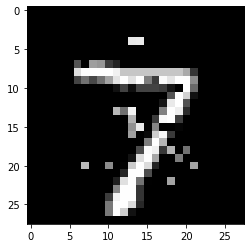

0.60186476
0.60328346
0.5499112
0.6303546
0.72317094
0.6756672
0.77264917
0.77242976
0.72135043
0.5960578
0.58531266
0.6396878
0.59900427
0.7398101
0.5499112
0.8141024
0.5499112
0.61479545
0.6896801
0.6516113
0.65435517
0.77831966
0.8305469
0.5499112
0.67851794
0.7152583
0.7293428
0.6245145
0.6690277
0.5499112
0.884579
0.63766164
0.74997044
0.65879226
0.61418927
0.7242815
0.8029704
0.82797956
0.6355766
0.69460654
0.5499112
0.61120737
0.5499112
0.7994976
0.7902594
0.8543889
0.75191313
0.6392364
0.7293077
0.6614383
0.5499112
0.77399564
0.5499112
0.7595301
0.5648494
0.58418506
0.6769496
0.71504545
0.676136
0.5499112
0.5991712
0.6681098
0.6200913
0.5499112
0.5499112
0.7314694
0.7632896
0.5499112
0.5499112
0.5499112
0.6870485
0.67505205
0.6859756
0.7675638
0.647357
0.600018
0.6608748
0.7217043
0.67558503
0.7133607
0.61860126
0.69905883
0.6533541
0.7107036
0.5499112
0.77222866
0.7319308
0.5499112
0.5499112
0.68794006
0.5499112
0.7373589
0.62632936
0.6715684
0.59936875
0.6331073
0.64211
0.889

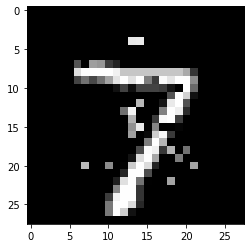

0.5355342
0.7304589
0.6450973
0.6317633
0.5355342
0.5341741
迭代: 52
置信度： 0.5341741


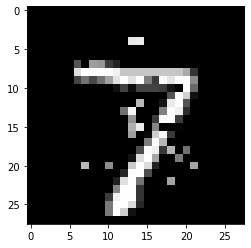

0.5341741
0.5341741
0.59076566
0.5341741
0.6807017
0.5346546
0.63168687
0.8178557
0.5341741
0.6051891
0.8963887
0.7358338
0.681729
0.6231344
0.5828399
0.5341741
0.7578856
0.781927
0.70185584
0.5694845
0.70499814
0.6616428
0.76211375
0.7357991
0.65794194
0.7553617
0.6526453
0.6513113
0.5341741
0.58834934
0.5341741
0.60246414
0.83668023
0.5341741
0.5341741
0.6560817
0.58139193
0.6391517
0.5341809
0.65604454
0.6204933
0.6153928
0.5341741
0.5341741
0.6005176
0.5815084
0.6088239
0.7284831
0.5341741
0.58703136
0.6894967
0.5341741
0.5831485
0.71253073
0.61195207
0.6343001
0.56918854
0.5341741
0.5528856
0.56206053
0.603727
0.5341741
0.5341741
0.79291165
0.7744604
0.5341741
0.61688066
0.5341741
0.65757215
0.5341741
0.5341741
0.6092446
0.5341741
0.78474885
0.7102387
0.76858723
0.6413749
0.5320879
迭代: 53
置信度： 0.5320879


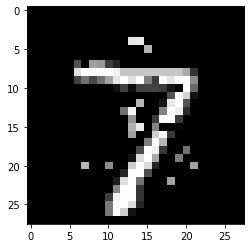

0.5612318
0.6542281
0.5320879
0.6072075
0.70511585
0.7264393
0.8172756
0.5320879
0.73256624
0.619405
0.59451365
0.6023202
0.7653238
0.56686074
0.6229337
0.5320879
0.6271624
0.70903873
0.6766985
0.7832528
0.6106719
0.6991578
0.604873
0.7139199
0.69328195
0.5320879
0.66730416
0.58452755
0.59612316
0.76742595
0.6491937
0.6392418
0.6531738
0.76578784
0.70917225
0.5972244
0.5320879
0.5320879
0.5320879
0.5320879
0.6363606
0.7231125
0.58303213
0.5320879
0.5320879
0.6184062
0.6328835
0.6775685
0.6492018
0.64710665
0.58536476
0.6027551
0.649223
0.61082065
0.5320879
0.5579861
0.73662543
0.5735157
0.6519013
0.59099126
0.638362
0.5320879
0.785827
0.5866428
0.7905505
0.5320879
0.5320879
0.89456177
0.6671736
0.5320879
0.731567
0.62443554
0.6213896
0.80888623
0.7338133
0.5705165
0.86346966
0.5320879
0.8260217
0.5320879
0.58333623
0.6418045
0.79557776
0.7450437
0.6099908
0.75434023
0.5320879
0.62830245
0.5320879
0.62568253
0.7560058
0.7401626
0.5320879
0.59398025
0.5320879
0.59949505
0.7952123
0.65646

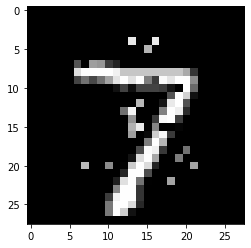

0.6923687
0.68617976
0.5991062
0.65119684
0.5306012
0.5306012
0.6921845
0.77957875
0.6420351
0.63741755
0.6421283
0.5306012
0.8445891
0.7761798
0.7595864
0.65472263
0.66524494
0.60620916
0.5306012
0.69488555
0.57947296
0.5737568
0.5306012
0.62677675
0.7492223
0.5753612
0.7031262
0.7501575
0.5306012
0.6308953
0.75476354
0.5896916
0.62163204
0.75557643
0.5704528
0.5706018
0.5306012
0.7315127
0.5306012
0.7177218
0.605616
0.7070064
0.5306012
0.645789
0.64299524
0.59608424
0.65422916
0.91089237
0.5306012
0.7603676
0.62524736
0.75570256
0.5685433
0.5822959
0.695224
0.5306012
0.69554013
0.6437678
0.5306012
0.57318205
0.5306012
0.67842454
0.6350799
0.5496372
0.5306012
0.5306012
0.7292011
0.70525146
0.62781256
0.809568
0.73871243
0.5938247
0.74245894
0.5306012
0.8000918
0.7290783
0.6300823
0.5306012
0.52774817
迭代: 55
置信度： 0.52774817


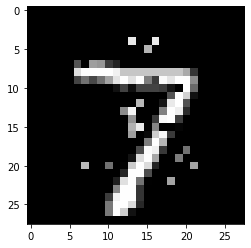

0.7418849
0.8073919
0.7917613
0.52774817
0.6479801
0.6193645
0.8088524
0.53520554
0.63069
0.7613337
0.52774817
0.58552736
0.61226225
0.8011131
0.8443958
0.60538495
0.6150446
0.76459163
0.52774817
0.7557327
0.7674614
0.6370453
0.52774817
0.5822854
0.6767459
0.5532529
0.6366522
0.72977793
0.52774817
0.7056981
0.5566477
0.52774817
0.61014974
0.52774817
0.52774817
0.6437021
0.69855434
0.68643856
0.60679775
0.6255266
0.6080224
0.57439464
0.62905014
0.77872646
0.7666936
0.8402969
0.60908884
0.77722245
0.52774817
0.5595543
0.5947111
0.70163137
0.52774817
0.7284931
0.60987175
0.52774817
0.7181845
0.52774817
0.52774817
0.58926696
0.66114587
0.52774817
0.5336742
0.86381656
0.52774817
0.65756863
0.61896205
0.7140353
0.712042
0.52774817
0.68803376
0.67590225
0.7605001
0.5910893
0.6046325
0.7493895
0.5713522
0.71966195
0.52774817
0.52774817
0.6775001
0.733986
0.5475861
0.82239914
0.59323925
0.66220254
0.5329772
0.79910487
0.62155074
0.6476074
0.603797
0.67089665
0.6490302
0.5791768
0.58148015
0.527

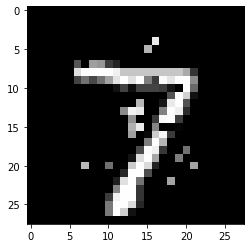

0.6332583
0.60972595
0.60146016
0.52035815
0.8095678
0.52035815
0.6107079
0.69913626
0.52035815
0.7426037
0.6082721
0.8476719
0.78101474
0.81445736
0.52035815
0.8572266
0.57674104
0.658911
0.52035815
0.8422558
0.696025
0.6147914
0.5971676
0.7731783
0.52035815
0.8036749
0.6497879
0.63299567
0.57579833
0.73317456
0.52035815
0.55904794
0.52035815
0.7317768
0.51753813
迭代: 57
置信度： 0.51753813


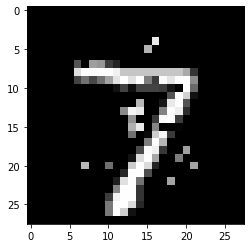

0.6614856
0.51753813
0.76084244
0.6176895
0.51753813
0.51753813
0.7453537
0.5903884
0.82822317
0.5489018
0.6605626
0.51753813
0.6668357
0.51753813
0.72591865
0.58974445
0.51753813
0.60043603
0.51753813
0.6660377
0.6208515
0.572591
0.75211173
0.7887614
0.56904435
0.61998063
0.54431725
0.76527995
0.57455367
0.5972921
0.5969109
0.6423034
0.6220363
0.5954029
0.51753813
0.51753813
0.5580548
0.6272701
0.7502896
0.51753813
0.6219005
0.6934467
0.7328244
0.51753813
0.71437687
0.51753813
0.7483717
0.51753813
0.70263726
0.51753813
0.51753813
0.5894695
0.51753813
0.74177086
0.5846057
0.51753813
0.6790552
0.54697686
0.7625735
0.58372027
0.51753813
0.65535927
0.6339112
0.73577726
0.8729245
0.5778319
0.5536984
0.7044742
0.546905
0.59010696
0.6583797
0.5612023
0.6952683
0.6911104
0.51753813
0.64656204
0.5828453
0.7211762
0.592644
0.6151663
0.59676623
0.51753813
0.56622
0.51753813
0.55036217
0.7101142
0.6732696
0.69468063
0.56827503
0.51753813
0.829429
0.6630374
0.66885465
0.51753813
0.58443904
0.58093

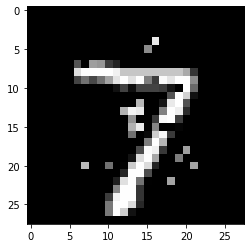

0.7184255
0.56840736
0.57236755
0.71868926
0.615691
0.5035703
0.5035703
0.5929242
0.5428464
0.7233337
0.53979397
0.7388257
0.5035703
0.71194553
0.5035703
0.7661645
0.76273406
0.52428603
0.6093487
0.6071664
0.67755985
0.5560355
0.8045419
0.69644356
0.6012168
0.5471416
0.5495653
0.8612146
0.64685327
0.7602301
0.6635041
0.7373585
0.84239805
0.62921077
0.7142452
0.6412028
0.6254556
0.6442458
0.5035703
0.67399406
0.5035703
0.5035703
0.8052779
0.65248245
0.56697935
0.6333172
0.6019743
0.70332545
0.5843338
0.825825
0.54475224
0.89025724
0.7272593
0.6998503
0.60433626
0.68974006
0.5480729
0.5969827
0.61854017
0.5683121
0.83211064
0.6573944
0.5507362
0.5539057
0.66973823
0.6837926
0.6998483
0.5035703
0.738261
0.5817721
0.67606723
0.5494766
0.5035703
0.53260463
0.6035211
0.56805426
0.58345747
0.6277314
0.77720195
0.5035703
0.65936655
0.5035703
0.67079026
0.75445026
0.57124203
0.8765856
0.5035703
0.66280144
0.8357748
0.59278584
0.5035703
0.5035703
0.5035703
0.65721995
0.59603494
0.81309766
0.5756

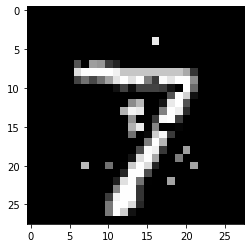

0.6864312
0.49060732
0.49060732
0.76361316
0.8107913
0.56492996
0.553653
0.6742407
0.49060732
0.6228592
0.76310146
0.49060732
0.574006
0.7112526
0.6879087
0.7506105
0.69530106
0.54350007
0.59162474
0.49060732
0.5380795
0.5343686
0.6929659
0.6305933
0.644045
0.63122696
0.5633431
0.49060732
0.6119567
0.51737607
0.49060732
0.7728997
0.838261
0.49060732
0.75852334
0.69360965
0.49060732
0.7313924
0.7174128
0.49060732
0.5613836
0.70376176
0.7456317
0.72828805
0.60300213
0.5268347
0.5814217
0.550584
0.5199032
0.56018424
0.49060732
0.7446596
0.56991196
0.5911499
0.6381658
0.6799118
0.49060732
0.68222547
0.5911189
0.49060732
0.57962656
0.6488626
0.6643243
0.757892
0.5816198
0.5407614
0.6739704
0.49060732
0.8577436
0.5879916
0.64118713
0.695938
0.49824485
0.7430392
0.71634054
0.6402128
0.49060732
0.6824938
0.49060732
0.5941287
0.7841034
0.57869184
0.5821868
0.5248692
0.53655434
0.8426443
0.7004565
0.49060732
0.5265057
0.6313595
0.8293634
0.7598574
0.59184456
0.49060732
0.77311105
0.6600818
0.745

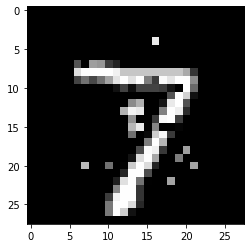

0.60577744
0.6545168
0.5574225
0.6262775
0.65833914
0.57915056
0.565273
0.6425267
0.5881999
0.6518819
0.5392632
0.489884
0.68157107
0.489884
0.55218095
0.8131018
0.489884
0.591384
0.58099985
0.61994517
0.68065596
0.6946562
0.73133355
0.59623903
0.52964425
0.66677165
0.489884
0.5805803
0.489884
0.7319899
0.6976026
0.7572649
0.6532114
0.6614015
0.6886352
0.76471657
0.70347774
0.53163606
0.53886694
0.489884
0.6492935
0.71096414
0.489884
0.7953928
0.5839756
0.6752288
0.489884
0.5483288
0.557542
0.59027123
0.58841157
0.7052747
0.7471299
0.64163846
0.58832943
0.489884
0.58630407
0.58675635
0.6179509
0.8133186
0.5448605
0.59523064
0.489884
0.6019811
0.68365073
0.69825643
0.5579773
0.6277914
0.6053315
0.7009077
0.8349904
0.6101577
0.57277536
0.63709944
0.5531366
0.88256574
0.5061112
0.69888395
0.58267814
0.54455024
0.625672
0.7707735
0.62810916
0.80695516
0.53074944
0.60453016
0.489884
0.65132076
0.70321435
0.5310308
0.7337271
0.5262393
0.5472171
0.5434688
0.52094424
0.55163956
0.6440178
0.707

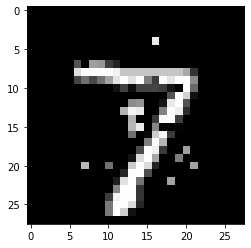

0.48629808
0.58922076
0.5735043
0.8358061
0.71210724
0.48629808
0.48629808
0.6647291
0.75212777
0.646446
0.73156
0.5793479
0.48629808
0.54311025
0.7672613
0.83796805
0.58785427
0.48629808
0.8286521
0.5789952
0.6091243
0.48629808
0.7270367
0.5925705
0.54022557
0.5275437
0.7619709
0.48629808
0.505771
0.48629808
0.605406
0.6441445
0.6315068
0.48629808
0.53032476
0.6989618
0.74965554
0.64086217
0.5840117
0.54957676
0.64504796
0.8936409
0.67978936
0.48629808
0.73108596
0.7129579
0.6802798
0.77093387
0.48629808
0.53730565
0.73507875
0.7322466
0.7095246
0.72848135
0.74776244
0.68029046
0.5736553
0.48629808
0.5362626
0.7018961
0.593548
0.48629808
0.5437219
0.61344016
0.5526778
0.6032084
0.6672505
0.6798956
0.60152435
0.66016114
0.52511054
0.52263993
0.51684856
0.6311715
0.7366262
0.6525523
0.6589016
0.48629808
0.74765795
0.82111895
0.87854725
0.64605546
0.633495
0.48629808
0.48629808
0.48629808
0.6475634
0.7401254
0.48629808
0.48629808
0.48629808
0.5355938
0.51765335
0.48629808
0.48629808
0.67

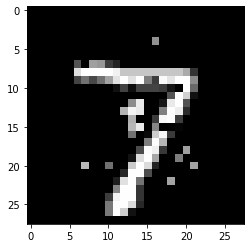

0.65201974
0.4821305
0.5254132
0.56844455
0.4821305
0.56340665
0.5421904
0.6526118
0.5974873
0.608765
0.64751136
0.56852525
0.4821305
0.55011076
0.5352675
0.63410205
0.59768033
0.4821305
0.7348723
0.5793689
0.5917727
0.55104214
0.4821305
0.5473226
0.7570955
0.6385333
0.4821305
0.4821305
0.4821305
0.6553608
0.6848416
0.70561105
0.67013186
0.8498479
0.6007294
0.6287219
0.64494634
0.6072644
0.647685
0.5246158
0.5280458
0.61726016
0.635894
0.5163663
0.51014584
0.69209725
0.4821305
0.4821305
0.48682046
0.7388339
0.83666354
0.5978533
0.6969683
0.57117474
0.7640921
0.68441826
0.58069915
0.49078897
0.59154636
0.6610395
0.5611737
0.63381106
0.65119874
0.5315971
0.5987258
0.74621
0.4821305
0.5161896
0.59377515
0.5997838
0.81873924
0.62958884
0.64285916
0.66414285
0.4821305
0.4821305
0.6042526
0.6555411
0.5656936
0.6245025
0.67371273
0.65627307
0.60292643
0.6765567
0.53898615
0.7688253
0.52914804
0.4821305
0.69437534
0.8556449
0.4821305
0.4821305
0.6378297
0.51111954
0.4821305
0.4821305
0.6683492

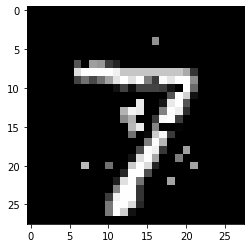

0.46183392
0.5792666
0.71369994
0.7092388
0.75542724
0.53777194
0.691252
0.58706313
0.46183392
0.6890732
0.8462867
0.69814014
0.5399571
0.7181079
0.46183392
0.6092987
0.4523407
迭代: 64
置信度： 0.4523407


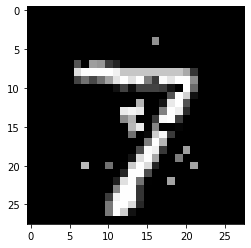

0.7890772
0.67116296
0.6973913
0.535195
0.60184383
0.74331045
0.5717681
0.7672158
0.6173505
0.5530253
0.46969762
0.6763122
0.61138165
0.7290763
0.5291959
0.4523407
0.53522843
0.5404455
0.54762095
0.6391428
0.72090673
0.5379395
0.53598434
0.4523407
0.5804979
0.632638
0.54835004
0.6230748
0.4523407
0.4523407
0.5953173
0.55058074
0.4957762
0.5970332
0.48346874
0.4523407
0.4523407
0.5309772
0.60127735
0.5226133
0.6643567
0.4523407
0.4523407
0.5158679
0.4523407
0.5717058
0.5950604
0.4523407
0.53196734
0.52274096
0.5098325
0.4523407
0.5426034
0.5422934
0.4523407
0.5151764
0.850883
0.55111325
0.4523407
0.7421365
0.57545197
0.6733381
0.4523407
0.7704565
0.62869096
0.4523407
0.5385806
0.76804215
0.70896614
0.72709507
0.6052209
0.4523407
0.4523407
0.4523407
0.5941085
0.51998085
0.9632418
0.64568937
0.63132894
0.73213625
0.74008936
0.57421535
0.7116621
0.45588684
0.8032705
0.5356453
0.5261644
0.619464
0.5832349
0.50966966
0.6287223
0.6774389
0.83253247
0.5066659
0.46049404
0.59756005
0.6117641
0.

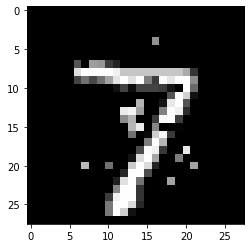

0.61964065
0.8583961
0.4513671
0.6257792
0.7317855
0.6328939
0.5218492
0.4513671
0.6131094
0.58464766
0.5308366
0.5759676
0.51825947
0.6429135
0.4513671
0.55464214
0.5730134
0.5338375
0.5332173
0.4693897
0.4925769
0.53343284
0.488264
0.4476679
迭代: 66
置信度： 0.4476679


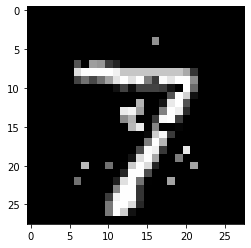

0.58935577
0.6783319
0.8034167
0.4476679
0.71692216
0.69900125
0.6011358
0.48187655
0.5162636
0.6778355
0.4476679
0.50182134
0.71739787
0.4476679
0.6188522
0.5590743
0.48009017
0.69466835
0.5203569
0.62964576
0.4476679
0.7540952
0.7252779
0.6030662
0.4476679
0.76760006
0.50889283
0.5823334
0.6802975
0.62023765
0.5629101
0.5125645
0.5604519
0.66542053
0.63888025
0.7361822
0.4476679
0.5281529
0.51624954
0.518612
0.4476679
0.6423339
0.55881333
0.73069495
0.5137224
0.6074564
0.64429504
0.4476679
0.7981237
0.6542379
0.8110107
0.6265919
0.62657315
0.83127123
0.68474305
0.52736956
0.7760385
0.5309024
0.81608844
0.4476679
0.64462703
0.56265134
0.44869733
0.4476679
0.60725486
0.6131861
0.63752115
0.4799879
0.7186087
0.6451066
0.64588505
0.527671
0.4476679
0.56080276
0.65666294
0.4476679
0.4881933
0.52668816
0.4476679
0.5157388
0.4476679
0.61511457
0.69090354
0.5216568
0.49222264
0.52637094
0.4476679
0.8179676
0.6091382
0.4476679
0.44708276
迭代: 67
置信度： 0.44708276


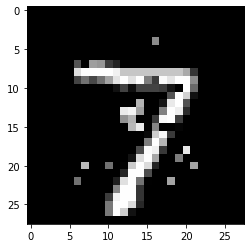

0.72484463
0.44708276
0.7394061
0.51268774
0.7229242
0.60963154
0.629334
0.56624436
0.57166123
0.5149051
0.7660879
0.6740855
0.52030355
0.5227955
0.5264828
0.7861757
0.44708276
0.5368816
0.6286232
0.6766816
0.7311016
0.6699644
0.6202641
0.59998286
0.484748
0.56924164
0.5076082
0.5099146
0.44708276
0.80982375
0.52295846
0.7014539
0.6118451
0.58076096
0.7001496
0.71540374
0.594308
0.5427394
0.5366761
0.7335308
0.44708276
0.47313142
0.44708276
0.84596187
0.57258135
0.8605143
0.54200727
0.49904785
0.7207824
0.6304858
0.4884699
0.54602456
0.6706094
0.64341277
0.44708276
0.77988786
0.552102
0.55056787
0.7568863
0.5016305
0.5876341
0.60324615
0.49649906
0.78666675
0.65615606
0.44708276
0.44941884
0.5747438
0.54651874
0.49564955
0.6451278
0.5070474
0.6257569
0.5353979
0.5808589
0.5118365
0.60527956
0.44708276
0.7339875
0.5180371
0.49878666
0.77134717
0.651481
0.5810332
0.56838
0.57164955
0.68369263
0.54004174
0.44708276
0.63885975
0.68620074
0.6651451
0.79415405
0.5039793
0.44708276
0.56859577

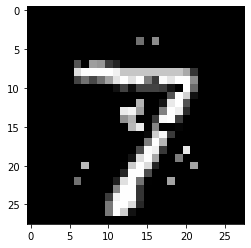

0.66798514
0.55316484
0.6946453
0.5394097
0.50454175
0.6120818
0.4985975
0.44394317
0.51512635
0.6381219
0.5253913
0.62594724
0.71199566
0.76095366
0.59426916
0.8182727
0.72439027
0.64004666
0.7125272
0.44394317
0.7542291
0.5143079
0.6205914
0.7810425
0.44394317
0.65016747
0.7056367
0.44394317
0.6552516
0.44394317
0.56510687
0.53980196
0.66566205
0.67188066
0.64351356
0.5164353
0.66349673
0.7715824
0.4893274
0.54744756
0.56949735
0.47500348
0.61572427
0.44394317
0.4414227
迭代: 69
置信度： 0.4414227


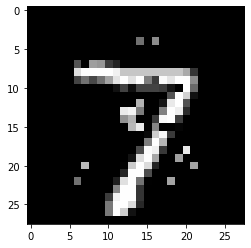

0.6199454
0.5783342
0.4414227
0.55288255
0.62363636
0.4664581
0.6099022
0.4414227
0.79505676
0.4414227
0.7131765
0.67616564
0.76432234
0.51760787
0.518665
0.48664594
0.7423123
0.5876478
0.4414227
0.6203146
0.7353686
0.52747756
0.7116604
0.4414227
0.54211086
0.5690407
0.4414227
0.50801575
0.4414227
0.6761073
0.61088187
0.53068936
0.5303927
0.61920786
0.5217861
0.60739595
0.6213624
0.5310515
0.4414227
0.5618617
0.5100052
0.77895623
0.7078524
0.62789375
0.67171055
0.46235365
0.4414227
0.4414227
0.56119186
0.57988536
0.52384895
0.5699943
0.4414227
0.48219436
0.4414227
0.64917225
0.48779282
0.46721262
0.70572275
0.6230655
0.78294915
0.6473488
0.6413776
0.6832709
0.4414227
0.4414227
0.48197505
0.624105
0.49006778
0.4414227
0.4414227
0.59165233
0.4414227
0.50973374
0.6034471
0.47889262
0.4414227
0.6408145
0.60196805
0.50910157
0.53798825
0.6120362
0.60162497
0.4414227
0.4854806
0.82084835
0.5470883
0.66946685
0.56719685
0.4414227
0.8220905
0.5415372
0.48291966
0.4414227
0.4414227
0.55385447
0

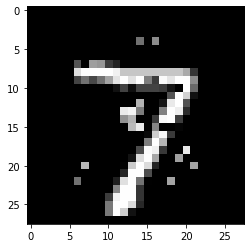

0.441214
0.80766094
0.67760247
0.88031536
0.56036574
0.49998707
0.441214
0.441214
0.82794535
0.6489782
0.87899226
0.5717055
0.8031884
0.441214
0.441214
0.441214
0.441214
0.7759145
0.53182197
0.441214
0.64899725
0.499167
0.441214
0.441214
0.5675973
0.48230264
0.60187507
0.52918524
0.6419281
0.5069091
0.51511383
0.441214
0.5620245
0.597816
0.45488325
0.6774883
0.5532613
0.5592689
0.54341096
0.5102223
0.64427006
0.5199705
0.6434518
0.55859977
0.5475169
0.6778289
0.5830853
0.6363456
0.46717966
0.6261755
0.4516477
0.5521004
0.54898465
0.5332885
0.5815954
0.57026047
0.73126733
0.441214
0.7803699
0.441214
0.5618986
0.6549929
0.441214
0.7975953
0.6128914
0.53714436
0.441214
0.62922806
0.441214
0.6295016
0.6047466
0.441214
0.5656411
0.51400375
0.5769793
0.51818
0.6673177
0.441214
0.441214
0.441214
0.55761284
0.441214
0.64142525
0.55824304
0.81749284
0.441214
0.56935596
0.48466495
0.6686727
0.798042
0.56190485
0.5653846
0.441214
0.5589407
0.441214
0.49932173
0.5814034
0.441214
0.441214
0.5029653

0.48266757
0.53474104
0.5715518
0.6699479
0.441214
0.441214
0.63099676
0.52548516
0.5741901
0.58707917
0.57703984
0.6245783
0.69803435
0.74894893
0.74792385
0.6958693
0.62098366
0.441214
0.72699654
0.5100841
0.49640164
0.5685961
0.57666355
0.5884074
0.728621
0.6693476
0.5687286
0.65968597
0.529542
0.57616156
0.5190846
0.6501145
0.52331954
0.7563087
0.6965135
0.441214
0.642802
0.6673321
0.6912298
0.54492533
0.5814136
0.5556469
0.6176291
0.6411517
0.47591975
0.58919334
0.52834797
0.5289737
0.65149534
0.441214
0.5674291
0.7518052
0.441214
0.441214
0.5833304
0.58266234
0.80943584
0.62168276
0.5095036
0.5742564
0.51748025
0.441214
0.65707743
0.77125347
0.6017484
0.6125478
0.47782457
0.441214
0.68890744
0.441214
0.48776144
0.63025343
0.6573234
0.60242736
0.6797255
0.5687266
0.6828168
0.49314705
0.441214
0.58397526
0.6465833
0.549715
0.5415473
0.7953356
0.7575378
0.80696213
0.5126803
0.82675856
0.54705894
0.64547914
0.52537394
0.57039064
0.63903487
0.6687283
0.441214
0.441214
0.58731353
0.495

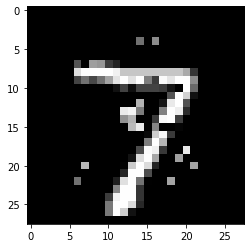

最终置信度： 0.441214
[1.6304792e-03 3.2069592e-03 3.9637543e-02 4.7185558e-01 1.9737805e-04
 1.6960565e-02 3.8250306e-05 4.4121400e-01 1.8591043e-02 6.6683041e-03]


In [42]:
# 改变坐标减小置信度
import copy
x_t = copy.deepcopy(x_f)
count = 0
for t in range(100):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  f_y >= 1.00000000e+00 or f_i >= 1.00000000e+00:
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

In [43]:
x_t

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.439182424,
 0,
 0.544320024,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.711585656,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [21]:
#test
count = 0
for i in range(784):
    if x_t[i] != 0:
        count+=1
print(count)

166


1


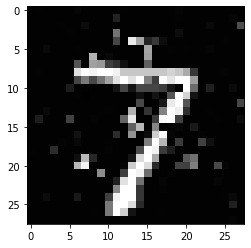

3


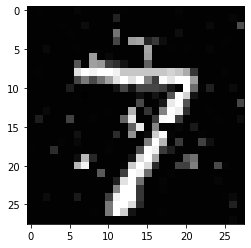

2


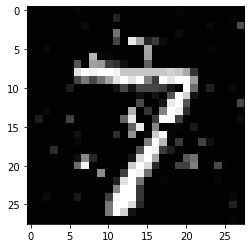

1


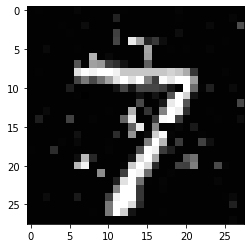

1


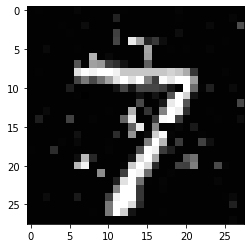

1


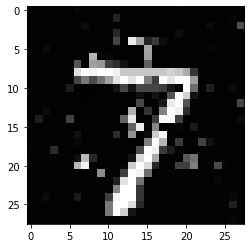

2


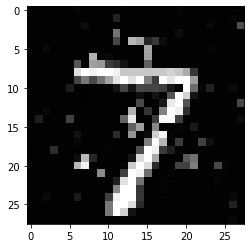

1


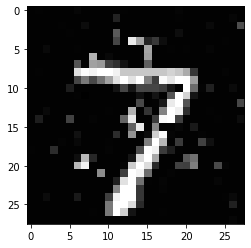

1


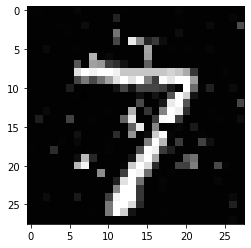

2


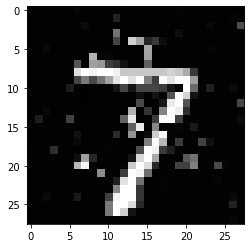

0


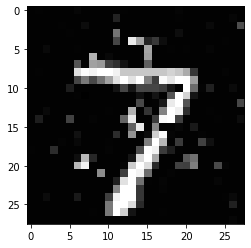

2


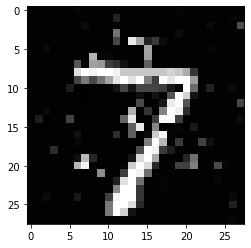

2


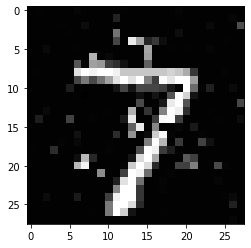

1


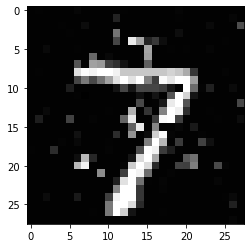

2


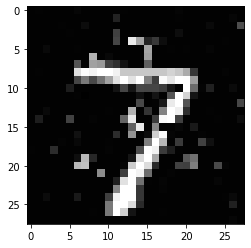

3


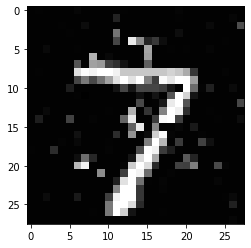

3


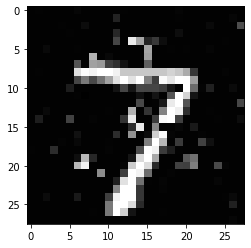

3


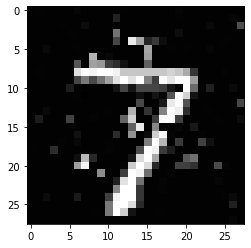

3


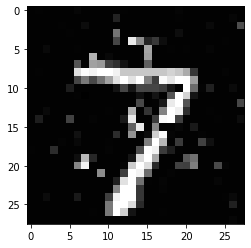

3


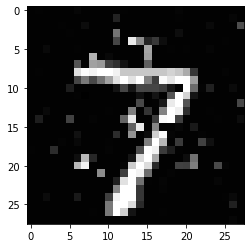

1


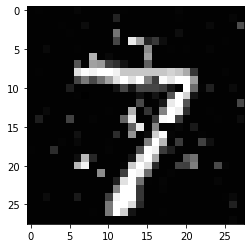

3


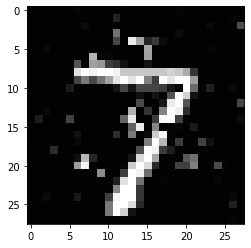

0


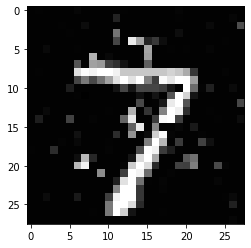

4


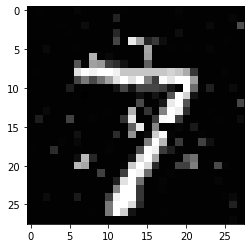

2


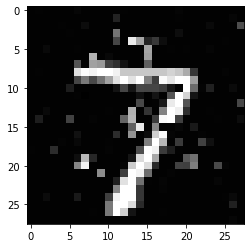

4


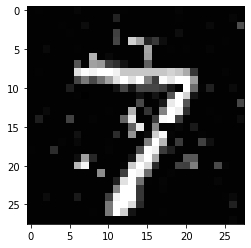

2


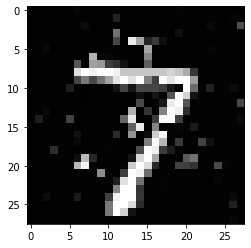

1


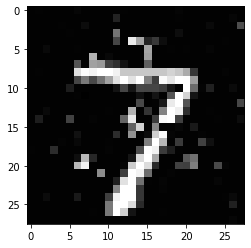

1


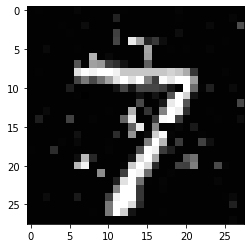

3


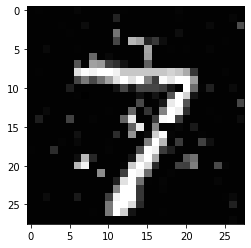

0


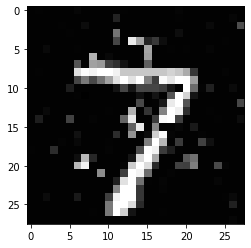

3


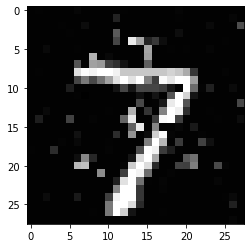

2


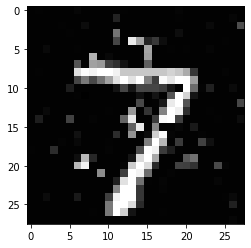

1


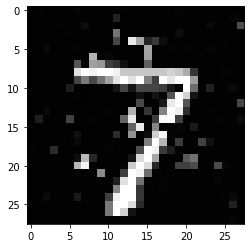

3


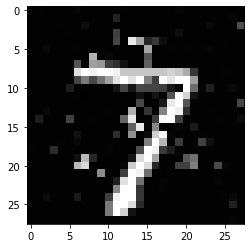

2


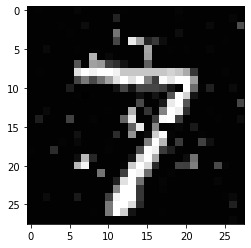

5


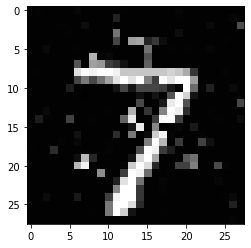

2


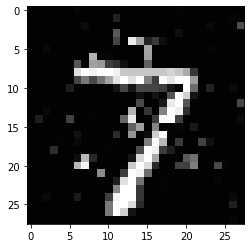

2


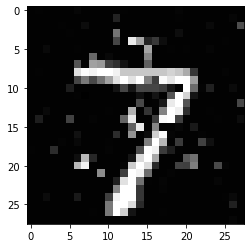

2


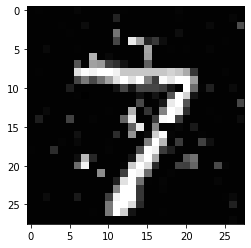

2


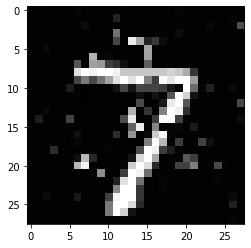

1


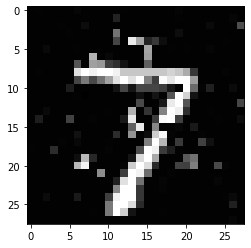

0


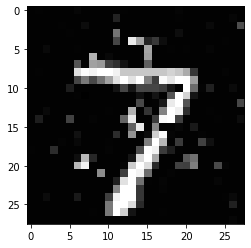

2


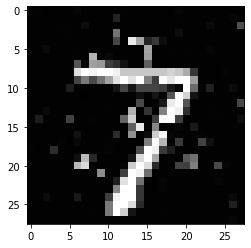

2


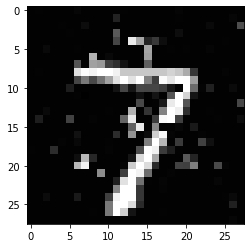

3


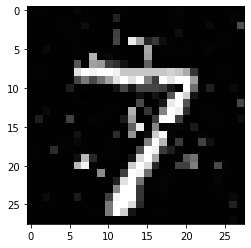

1


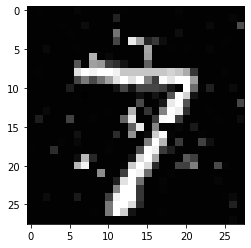

3


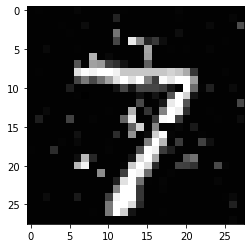

1


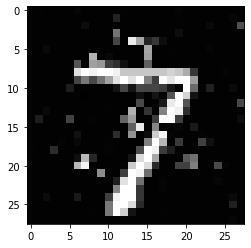

2


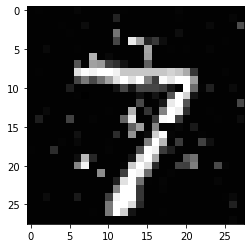

In [22]:
# 种群再次生成
import copy
x_tmp_f = copy.deepcopy(x_t)
x_des_f = []
for r in range(50):
    count = 0
    for k in range(784):
        if x_t[k] > 0.3:
            x = random.randint(0,10000)/10000
            if x <= 0.1:
                x_tmp_f[k] -= random.randint(1,3)/10
                count += 1
    print(count)
    x_des_f.append(np.array(x_tmp_f.reshape(1,784)))
    x_re = x_tmp_f+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp_f = copy.deepcopy(x_t)

最优值： 0.45310542 扰动程度 12.177310532500497
最优值： 0.46030623 扰动程度 11.93265900986678
最优值： 0.45149383 扰动程度 11.758655704014357
最优值： 0.5328612 扰动程度 11.464869246570535
最优值： 0.5049089 扰动程度 11.398548258956405
最优值： 0.5159235 扰动程度 11.320779620665016
最优值： 0.5612479 扰动程度 11.052875133777572
最优值： 0.5600607 扰动程度 10.987956867177013
最优值： 0.5740809 扰动程度 10.808424846238736
最优值： 0.5740809 扰动程度 10.808424846238736
最优值： 0.60205495 扰动程度 10.666663031212002
最优值： 0.5980479 扰动程度 10.659566215118396
最优值： 0.61136127 扰动程度 10.376288932744856
最优值： 0.649609 扰动程度 9.878564889352598
最优值： 0.6570541 扰动程度 9.852990494917291
最优值： 0.71704435 扰动程度 9.515507065390771
最优值： 0.71704435 扰动程度 9.515507065390771
最优值： 0.74538946 扰动程度 9.429514953107164
最优值： 0.72748125 扰动程度 9.207918673380773
最优值： 0.73007923 扰动程度 9.186968902863548
最优值： 0.73295444 扰动程度 9.140957437639615
最优值： 0.7841506 扰动程度 8.853029978143924
最优值： 0.7826696 扰动程度 8.804973670680154
最优值： 0.805607 扰动程度 8.793282686014336
最优值： 0.7878994 扰动程度 8.8048093911311
最优值： 0.81256586 扰动程度 8.74447006

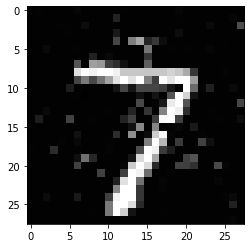

In [23]:
MAX_GENERATION = 50  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X_F = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des_f, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X_F = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X_F + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X_F = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X_F),"扰动程度",Dis(BEST_X_F))
        if GENERATION == MAX_GENERATION:
            BEST_F = BEST_X_F+x_test[0]/255
            print(BEST_X_F)
            plt.imshow(BEST_F.reshape(28,28),cmap='gray')
            plt.show()
            break